<a href="https://colab.research.google.com/github/nath1424/TAREA-2-VOLATILIDAD__/blob/main/TAREA_2_VOLATILIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 2: VOLATILIDAD**

*INTEGRANTES:*

• Fabian Espinoza, Jaime Jesús 18120166

• Flores Mauricio, Daniel Santiago 20120084

• Pesantes Egúsquiza, Claudia Mirian 20120231

• Rodriguez Garcia, Alejandra Yohana 20120049

• Valencia Carhuas Flavia Mercedes 19120190

• Valladares Bengolea, Nathaly Pelaya 19120184

# Sección - N°0
##**Actualización de Datos**



In [ ]:
# Importando las bibliotecas necesarias
import yfinance as yf
import pandas as pd
import warnings

# Ignorar mensajes de advertencia
warnings.filterwarnings("ignore")

# Usando el método download() para obtener los datos
raw_data = yf.download(
    tickers="^GSPC ^FTSE ^N225 ^GDAXI",
    start="1994-01-07",
    end="2023-09-22",
    interval="1d",
    group_by='ticker',
    auto_adjust=True,
    threads=True  # Corrección: cambia treads a threads
)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Crear una copia de respaldo en caso de cambios accidentales
df_comp = raw_data.copy()


In [ ]:
# Agregar nuevas columnas al conjunto de datos
df_comp['spx'] = df_comp['^GSPC']['Close']
df_comp['dax'] = df_comp['^GDAXI']['Close']
df_comp['ftse'] = df_comp['^FTSE']['Close']
df_comp['nikkei'] = df_comp['^N225']['Close']

# Eliminar las columnas originales de los índices
df_comp = df_comp.iloc[1:]  # Eliminar los primeros elementos debido a las diferencias de zonas horarias
df_comp = df_comp.asfreq('b')  # Establecer la frecuencia de los datos
df_comp = df_comp.fillna(method='ffill')  # Rellenar los valores faltantes



In [ ]:
# Mostrar los primeros y últimos elementos para verificar
print(df_comp.head())
print(df_comp.tail())


                  ^FTSE                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0   
1994-01-13  3380.699951  3383.300049  3356.899902  3360.000000    0.0   
1994-01-14  3370.899902  3405.600098  3369.399902  3400.600098    0.0   

                 ^GDAXI                                                ...  \
                   Open         High          Low        Close Volume  ...   
Date                                                                   ...   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0  ...   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0  ...   
1994-01-12  2227.120117  

# Sección - N°1
##**Introducción a las series de tiempo**

In [ ]:
#Esto se realiza para importar los paquetes
import pandas as pd
import numpy as np

In [ ]:
#Procedemos a importar los datos
# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)



Carga exitosa del archivo CSV.


In [ ]:
#Procedemos a examinar los datos
df_comp.head()
#Se utiliza para mostrar las primeras filas de un DataFrame en pandas.
#Es útil para inspeccionar rápidamente los datos y ver qué tipo de información contiene el DataFrame.

date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [ ]:
df_comp
#permite conocer el número total de filas y columnas del conjunto de datos.

date          spx          dax         ftse       nikkei
0    1994-01-07   469.900000   2224.95000  3445.980000  18124.01000
1    1994-01-10   475.270000   2225.00000  3440.580000  18443.44000
2    1994-01-11   474.130000   2228.10000  3413.770000  18485.25000
3    1994-01-12   474.170000   2182.06000  3372.020000  18793.88000
4    1994-01-13   472.470000   2142.37000  3360.010000  18577.26000
...         ...          ...          ...          ...          ...
7735 2023-09-18  4453.529785  15727.12012  7652.899902  33533.08984
7736 2023-09-19  4443.950195  15664.48047  7660.200195  33242.58984
7737 2023-09-20  4402.200195  15781.58984  7731.700195  33023.78125
7738 2023-09-21  4330.000000  15571.86035  7678.600098  32571.02930
7739 2023-09-22  4320.060059  15557.29004  7683.899902  32402.41016

[7740 rows x 5 columns]

In [ ]:
df_comp.describe()
#Se utiliza para obtener un resumen estadístico de las columnas numéricas.

spx           dax         ftse        nikkei
count  7740.000000   7740.000000  7740.000000   7740.000000
mean   1719.592669   7486.406267  5745.854020  16626.322627
std    1036.135372   3884.179078  1250.634258   5769.017622
min     438.920000   1911.700000  2876.600000   7054.980000
25%    1084.449811   4491.120000  4902.417500  11356.965000
50%    1330.035000   6481.435000  5923.020000  16403.370000
75%    2104.082411  10664.042500  6694.049287  20210.490000
max    4796.560059  16469.750000  8014.299805  33753.328130

In [ ]:
df_comp.isna()


date    spx    dax   ftse  nikkei
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False
4     False  False  False  False   False
...     ...    ...    ...    ...     ...
7735  False  False  False  False   False
7736  False  False  False  False   False
7737  False  False  False  False   False
7738  False  False  False  False   False
7739  False  False  False  False   False

[7740 rows x 5 columns]

In [ ]:
df_comp.spx.isna().sum()


0

In [ ]:
#Pasamos a crear gráficas a partir de los datos recolectados
import matplotlib.pyplot as plt


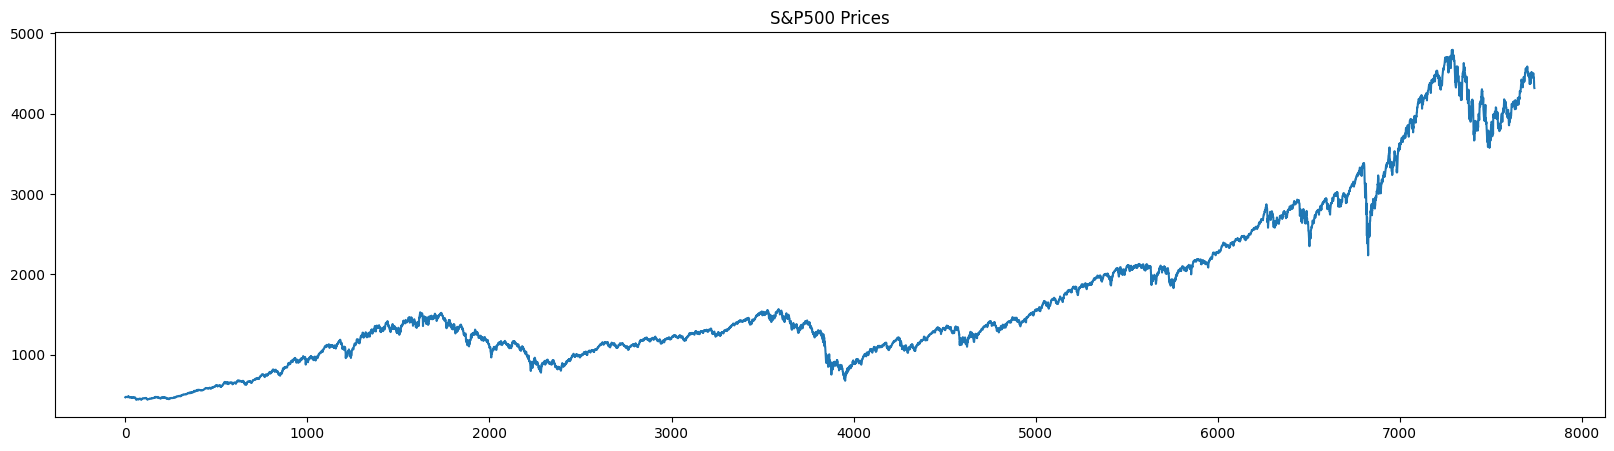

In [ ]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show()
#el código crea un gráfico de línea que muestra la serie temporal de los precios del S&P 500 con un título "S&P500 Prices".
#Las dimensiones de la figura se establecen en 20 unidades de ancho y 5 unidades de alto, y el gráfico se muestra en una ventana gráfica.
#Esto es útil para visualizar los datos y entender la evolución de los precios del S&P 500 a lo largo del tiempo.

In [ ]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()
#el código crea un gráfico de línea que muestra la serie temporal de los precios del FTSE 100 con un título "FTSE100 Prices".
#Las dimensiones de la figura se establecen en 20 unidades de ancho y 5 unidades de alto, y el gráfico se muestra en una ventana gráfica.
#Esto es útil para visualizar los datos y entender la evolución de los precios del FTSE 100 a lo largo del tiempo.

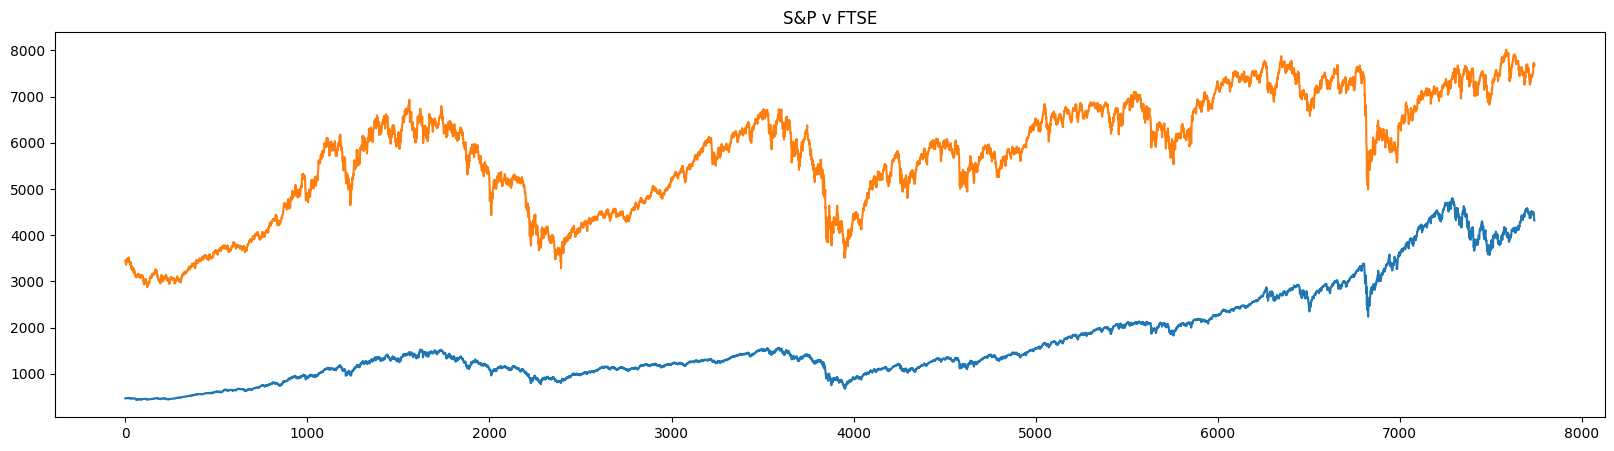

In [ ]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.show()
#Este código crea dos gráficos de series temporales para los precios del S&P 500 y del FTSE 100,
#y luego superpone un título que compara ambas series en una misma figura.
#Esto permite visualizar y comparar fácilmente la evolución de los precios de ambos índices.

In [ ]:
#Realizamos The QQ Plot
#Esta es una herramienta gráfica que permite visualizar cuantitativamente cuán bien los datos se ajustan a una distribución de probabilidad
#teórica, lo que es fundamental en el análisis estadístico y en la toma de decisiones basada en datos.
import scipy.stats
import pylab

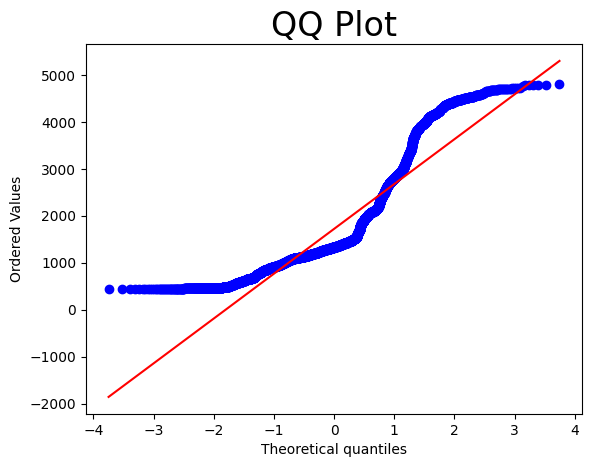

In [ ]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()
#El QQ plot es útil para evaluar si los datos se ajustan a una distribución teórica, como la distribución normal.
#Si los puntos en el gráfico se aproximan a una línea diagonal, esto indica que los datos tienen una distribución
#similar a la distribución teórica.
#Si los puntos se desvían significativamente de la línea diagonal, podría indicar que los datos no siguen la distribución teórica.

# Sección - N°2
##**Crear un objeto de serie temporal en Python**

In [ ]:
import pandas as pd
import numpy as np

# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv 7'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)

# Longitud del período de tiempo
df_comp.describe()



In [ ]:
df_comp.head()

date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [ ]:
df_comp.date.describe()

count                    8331
unique                   8331
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2023-09-22 00:00:00
Name: date, dtype: object

**Del texto a la fecha**

In [ ]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [ ]:
df_comp.head()

date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26

In [ ]:
df_comp.date.describe()

count                    8331
unique                   8331
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2023-09-22 00:00:00
Name: date, dtype: object

**Ajustar el índce**

In [ ]:
df_comp.set_index("date")

spx          dax     ftse       nikkei
date                                                      
1994-01-07   469.900000   2224.95000  3445.98  18124.01000
1994-01-10   475.270000   2225.00000  3440.58  18443.44000
1994-01-11   474.130000   2228.10000  3413.77  18485.25000
1994-01-12   474.170000   2182.06000  3372.02  18793.88000
1994-01-13   472.470000   2142.37000  3360.01  18577.26000
...                 ...          ...      ...          ...
2023-09-18  4453.529785  15727.12012  7652.94          NaN
2023-09-19  4443.950195  15664.48047  7660.20  33242.58984
2023-09-20  4402.200195  15781.58984  7731.65  33023.78125
2023-09-21  4330.000000  15571.86035  7678.62  32571.02930
2023-09-22  4320.060000  15557.29004  7683.91  32402.41016

[8331 rows x 4 columns]

In [ ]:
df_comp.set_index("date", inplace=True)
df_comp.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

In [ ]:
#df_comp.date.describe() #Expect to get an error message because we no longer have a "date" column since it is the index

**Ajustar a la frecuencia deseada**

In [ ]:
df_comp=df_comp.asfreq('d')

In [ ]:

df_comp

spx          dax     ftse       nikkei
date                                                      
1994-01-07   469.900000   2224.95000  3445.98  18124.01000
1994-01-08          NaN          NaN      NaN          NaN
1994-01-09          NaN          NaN      NaN          NaN
1994-01-10   475.270000   2225.00000  3440.58  18443.44000
1994-01-11   474.130000   2228.10000  3413.77  18485.25000
...                 ...          ...      ...          ...
2023-09-18  4453.529785  15727.12012  7652.94          NaN
2023-09-19  4443.950195  15664.48047  7660.20  33242.58984
2023-09-20  4402.200195  15781.58984  7731.65  33023.78125
2023-09-21  4330.000000  15571.86035  7678.62  32571.02930
2023-09-22  4320.060000  15557.29004  7683.91  32402.41016

[10851 rows x 4 columns]

In [ ]:
df_comp=df_comp.asfreq('b')

In [ ]:
df_comp.head()

spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26

**Tratamiento de valores pérdidos**

In [ ]:
df_comp.isna()

spx    dax   ftse  nikkei
date                                   
1994-01-07  False  False  False   False
1994-01-10  False  False  False   False
1994-01-11  False  False  False   False
1994-01-12  False  False  False   False
1994-01-13  False  False  False   False
...           ...    ...    ...     ...
2023-09-18  False  False  False    True
2023-09-19  False  False  False   False
2023-09-20  False  False  False   False
2023-09-21  False  False  False   False
2023-09-22  False  False  False   False

[7751 rows x 4 columns]

In [ ]:
df_comp.isna().sum()

spx        60
dax        47
ftse       56
nikkei    102
dtype: int64

In [ ]:
df_comp

spx          dax     ftse       nikkei
date                                                      
1994-01-07   469.900000   2224.95000  3445.98  18124.01000
1994-01-10   475.270000   2225.00000  3440.58  18443.44000
1994-01-11   474.130000   2228.10000  3413.77  18485.25000
1994-01-12   474.170000   2182.06000  3372.02  18793.88000
1994-01-13   472.470000   2142.37000  3360.01  18577.26000
...                 ...          ...      ...          ...
2023-09-18  4453.529785  15727.12012  7652.94          NaN
2023-09-19  4443.950195  15664.48047  7660.20  33242.58984
2023-09-20  4402.200195  15781.58984  7731.65  33023.78125
2023-09-21  4330.000000  15571.86035  7678.62  32571.02930
2023-09-22  4320.060000  15557.29004  7683.91  32402.41016

[7751 rows x 4 columns]

In [ ]:
df_comp.spx=df_comp.spx.fillna(method='ffill')
df_comp.isna().sum()

spx         0
dax        47
ftse       56
nikkei    102
dtype: int64

In [ ]:
df_comp.ftse=df_comp.ftse.fillna(method='bfill')
df_comp.dax=df_comp.dax.fillna(value = df_comp.dax.mean())

**Simplificación de datos conjuntos**

In [ ]:
df_comp['market_value']=df_comp.spx
df_comp.describe()

spx           dax         ftse        nikkei  market_value
count  7751.000000   7751.000000  7751.000000   7649.000000   7751.000000
mean   1720.123683   7460.421956  5746.831485  16526.870790   1720.123683
std    1035.983884   3861.033445  1250.459401   5717.140635   1035.983884
min     438.920000   1911.700000  2876.600000   7054.980000    438.920000
25%    1084.671653   4494.935000  4903.145000  11318.510000   1084.671653
50%    1330.410000   6492.530000  5923.530000  16350.020000   1330.410000
75%    2104.190938  10584.225000  6694.167149  20093.030000   2104.190938
max    4796.560059  16469.750000  8014.310000  33753.328130   4796.560059

In [ ]:
del df_comp['spx']
df_comp.describe()

dax         ftse        nikkei  market_value
count   7751.000000  7751.000000   7649.000000   7751.000000
mean    7460.421956  5746.831485  16526.870790   1720.123683
std     3861.033445  1250.459401   5717.140635   1035.983884
min     1911.700000  2876.600000   7054.980000    438.920000
25%     4494.935000  4903.145000  11318.510000   1084.671653
50%     6492.530000  5923.530000  16350.020000   1330.410000
75%    10584.225000  6694.167149  20093.030000   2104.190938
max    16469.750000  8014.310000  33753.328130   4796.560059

In [ ]:
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
df_comp.describe()

market_value
count   7751.000000
mean    1720.123683
std     1035.983884
min      438.920000
25%     1084.671653
50%     1330.410000
75%     2104.190938
max     4796.560059

**Dividir los datos**

In [ ]:
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df.tail()

market_value
date                    
2017-10-06   2549.331509
2017-10-09   2544.728577
2017-10-10   2550.642433
2017-10-11   2555.240789
2017-10-12   2550.933009

In [ ]:
df_test.head()

market_value
date                    
2017-10-13   2553.169373
2017-10-16   2557.639738
2017-10-17   2559.356311
2017-10-18   2561.264453
2017-10-19   2562.103755

# Sección - N°3
# **Trabajando con series de tiempo en Phyton**

In [ ]:
#Esto se realiza para importar los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Cargando y transformando los datos

In [ ]:
#Procedemos a importar los datos
import pandas as pd

# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'

# Cargar el archivo CSV desde la URL pública
df_comp = pd.read_csv(file_url, sep=';')  # Se especifica el separador como ';'

# Convertir la columna 'date' a formato de fecha
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

# Establecer la columna 'date' como el índice
df_comp.set_index('date', inplace=True)

# Asegurarse de que los datos estén en frecuencia comercial
df_comp = df_comp.asfreq('b')

# Rellenar los valores faltantes con el método 'ffill'
df_comp = df_comp.fillna(method='ffill')

# Imprimir las primeras filas del DataFrame para verificar los cambios
print(df_comp.head())
raw_csv_data = pd.read_csv(file_url)
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


In [ ]:
print(df_comp.head())

         date  market_value
0  07/01/1994        469.90
1  10/01/1994        475.27
2  11/01/1994        474.13
3  12/01/1994        474.17
4  13/01/1994        472.47


Eliminación de datos excedentes


In [ ]:
import pandas as pd

# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'

# Cargar el archivo CSV desde la URL pública y especificar el separador como ';'
df_comp = pd.read_csv(file_url, sep=';')

# Verificar el nombre de las columnas en el DataFrame
print(df_comp.columns)
df_comp['market_value'] = df_comp['spx']

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')


In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

White Noise

In [ ]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [ ]:
df['wn'] = wn

<ipython-input-19-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [ ]:
df.describe()

market_value           wn
count   6192.000000  6192.000000
mean    1271.093709  1271.111100
std      465.803136   472.745435
min      438.920000  -298.771317
25%      987.294981   947.284661
50%     1226.345178  1274.929906
75%     1449.635000  1597.374920
max     2555.240789  2881.512006

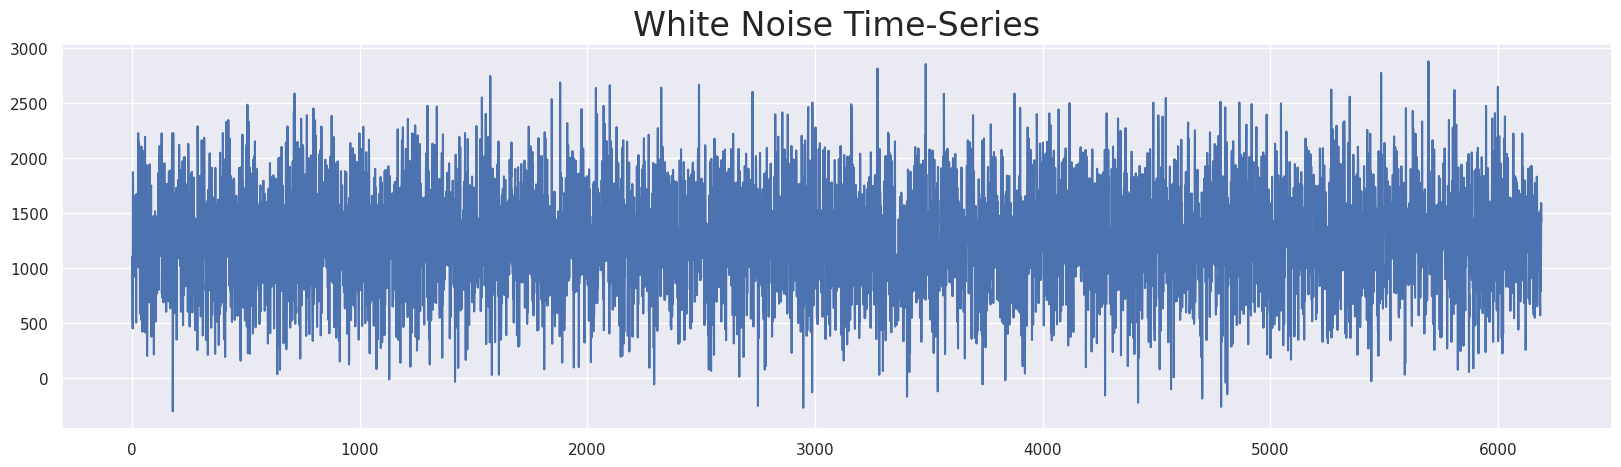

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

Random Walk

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv"
download = requests.get(url).content

# Decodificar y dividir los datos en columnas utilizando el separador ';'
decoded_content = download.decode('utf-8')
rw = pd.read_csv(StringIO(decoded_content), sep=';')

# Convertir la columna 'date' a formato de fecha y hora
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)

# Establecer la columna 'date' como el índice del DataFrame
rw.set_index('date', inplace=True)

# Asegurarse de que los datos estén en frecuencia comercial
rw = rw.asfreq('b')
print(rw.head())


               spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26


In [ ]:
rw['price'] = rw[['spx', 'dax', 'ftse', 'nikkei']].mean(axis=1)

In [ ]:
print(rw['price'].to_frame(name='price').describe())

              price
count   7740.000000
mean    7894.543896
std     2685.721171
min     3559.306303
25%     5847.928083
50%     7139.721039
75%     9460.155243
max    15528.999512


In [ ]:
df['rw'] = rw.price

In [ ]:
# Asegurarte de que 'market_value' y 'wn' tengan datos en tu DataFrame

# Inicializar el valor de la primera fila de 'rw' como el promedio de 'market_value' y 'wn' en la primera fila
df.at[0, 'rw'] = (df.at[0, 'market_value'] + df.at[0, 'wn']) / 2

# Generar valores para 'rw' basados en 'market_value' y 'wn'
for i in range(1, len(df)):
    df.at[i, 'rw'] = (df.at[i, 'market_value'] + df.at[i, 'wn']) / 2  # Puedes ajustar esta fórmula según tus necesidades

# Imprimir las primeras filas del DataFrame con las columnas 'date', 'market_value', 'wn', y 'rw'
print(df[['date', 'market_value', 'wn', 'rw']].head().to_string())

         date  market_value       wn        rw
0  07/01/1994        469.90  2224.95  1347.425
1  10/01/1994        475.27  2225.00  1350.135
2  11/01/1994        474.13  2228.10  1351.115
3  12/01/1994        474.17  2182.06  1328.115
4  13/01/1994        472.47  2142.37  1307.420


In [ ]:
df.head()

date  market_value       wn     ftse    nikkei        rw
0  07/01/1994        469.90  2224.95  3445.98  18124.01  1347.425
1  10/01/1994        475.27  2225.00  3440.58  18443.44  1350.135
2  11/01/1994        474.13  2228.10  3413.77  18485.25  1351.115
3  12/01/1994        474.17  2182.06  3372.02  18793.88  1328.115
4  13/01/1994        472.47  2142.37  3360.01  18577.26  1307.420

         date  market_value       wn        rw
0  07/01/1994        469.90  2224.95  1347.425
1  10/01/1994        475.27  2225.00  1350.135
2  11/01/1994        474.13  2228.10  1351.115
3  12/01/1994        474.17  2182.06  1328.115
4  13/01/1994        472.47  2142.37  1307.420


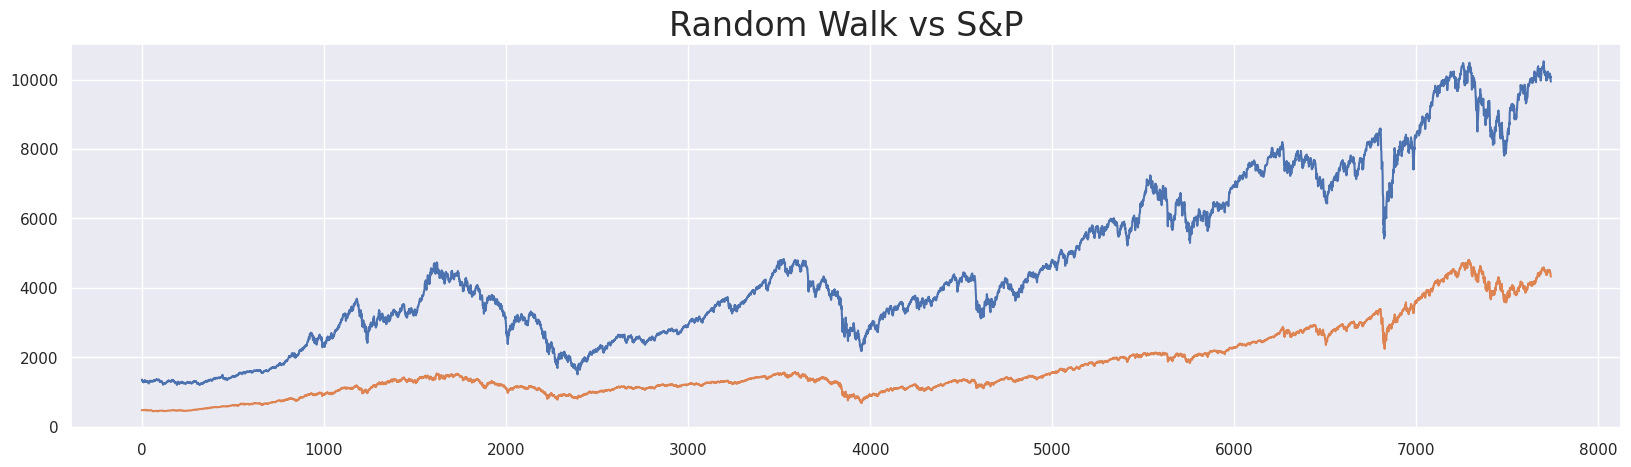

In [ ]:
# Asegurarse de que los nombres de las columnas sean 'market_value', 'wn' y 'rw'
# Reemplazar 'nombre_actual' con el nombre real de la columna si es diferente
df.rename(columns={'spx': 'market_value', 'dax': 'wn', 'date': 'date', 'rw': 'rw'}, inplace=True)

# Imprimir las primeras filas del DataFrame con los encabezados específicos
print(df[['date', 'market_value', 'wn', 'rw']].head().to_string())

# Corregir el código para la visualización
df['rw'].plot(figsize=(20, 5))
df['market_value'].plot()

# Agregar título al gráfico
plt.title("Random Walk vs S&P", size=24)

# Mostrar el gráfico
plt.show()

**Estacionariedad**

In [ ]:
sts.adfuller(df.market_value)

(0.9165652682290658,
 0.9933027439967606,
 32,
 7707,
 {'1%': -3.431198771163525,
  '5%': -2.8619150940761386,
  '10%': -2.566969658034755},
 69608.36547463769)

In [ ]:
sts.adfuller(df.wn)

(-0.6618198042984398,
 0.8563928111293213,
 9,
 7730,
 {'1%': -3.4311962448730675,
  '5%': -2.8619139778015765,
  '10%': -2.5669690638278646},
 93326.37768971655)

In [ ]:
sts.adfuller(df.rw)

(-0.26464971911642565,
 0.9303639132755245,
 25,
 7714,
 {'1%': -3.43119800069723,
  '5%': -2.861914753635605,
  '10%': -2.5669694768139895},
 84543.69214532405)

**Estacionalidad**

In [ ]:
print(df.index)
print(df.index.freq)

DatetimeIndex(['1994-07-01'], dtype='datetime64[ns]', freq='B')
<BusinessDay>


In [ ]:
print(df.head())


            market_value       wn     ftse    nikkei
date                                                
1994-07-01        469.90  2224.95  3445.98  18124.01
1994-10-01        475.27  2225.00  3440.58  18443.44
1994-11-01        474.13  2228.10  3413.77  18485.25
1994-12-01        474.17  2182.06  3372.02  18793.88
1994-01-13        472.47  2142.37  3360.01  18577.26


In [ ]:
print(df.columns)

Index(['spx', 'dax', 'ftse', 'nikkei'], dtype='object')


In [ ]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
%matplotlib inline
s_dec_multiplicative = seasonal_decompose(df['market_value'], model="multiplicative")
s_dec_multiplicative.plot()
plt.show()

**ACF**


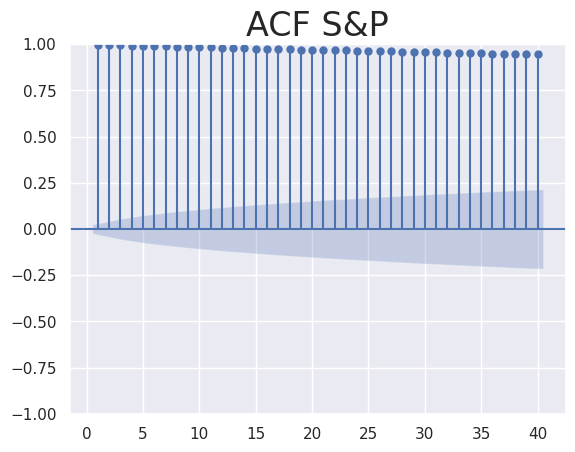

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

**PACF**

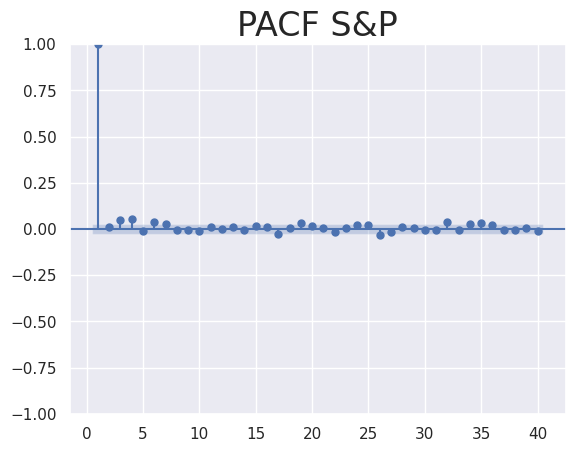

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

In [ ]:
print(df.columns)

Index(['market_value', 'returns', 'sq_returns'], dtype='object')


1


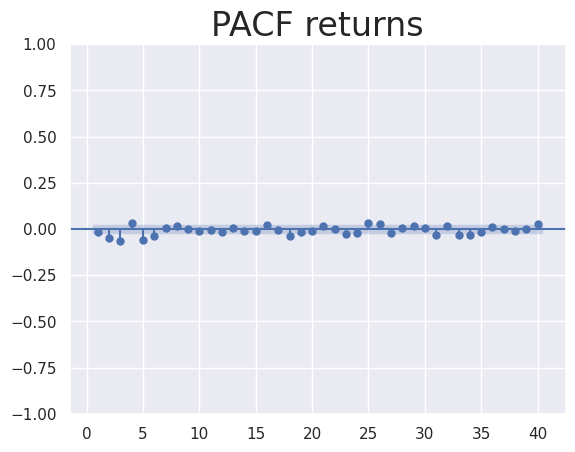

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Asegúrate de que df esté definido correctamente y contenga la columna 'returns'

# Verifica si hay valores faltantes en la columna 'returns'
print(df['returns'].isnull().sum())

# Reemplaza 'returns' con el nombre de la columna adecuada en tu DataFrame df
# Asegúrate de que no haya valores nulos en la columna 'returns'
plot_pacf(df['returns'].dropna(), lags=40, zero=False, method='ols')
plt.title("PACF returns", size=24)
plt.show()

# Sección - N°4

In [ ]:
# Instalar los Paquetes
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install gdown
!pip install statsmodels

In [ ]:
# Luego, Realizar la Importacion de Paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

# Descargar el Archivo CSV desde Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Luego el Siguiente Comando
df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()
Carga exitosa del archivo CSV
# Continuar
df = pd.read_csv(r'C:/Users/Usuario/Downloads/Index2018.csv')
# Definimos el Archivo
raw_csv_data = pd.read_csv("Index2018.csv")
# Limitamos y Definimos nuestras Columnas
df_comp = pd.read_csv('Index2018.csv', delimiter=';')
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse

# Calcula el tamaño de los datos de entrenamiento como el 80% del tamaño total del DataFrame df_comp
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

THE ACF
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

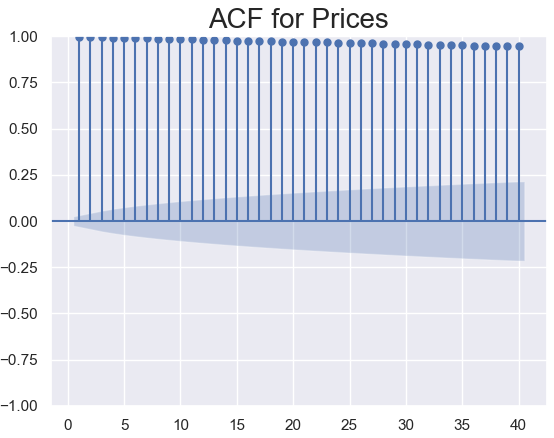

In [ ]:
# Realizamos el Modulo de Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

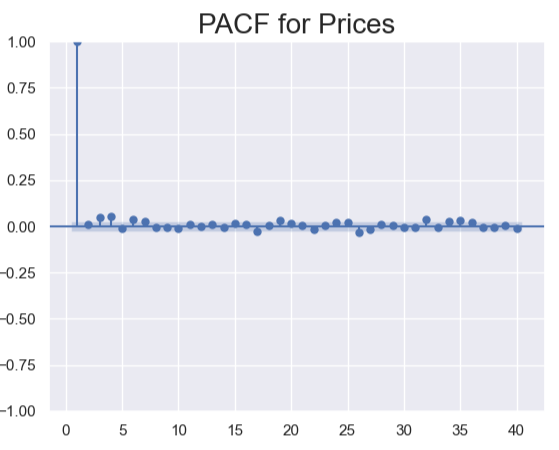

In [ ]:
# Continuar con la Definicion del modelo
from statsmodels.tsa.arima.model import ARIMA
# Definir el Codigo del Modelo y realizar con 1 Rezago
model_ar = ARIMA(df.market_value, order=(1, 0, 0))
results_ar = model_ar.fit()
results_ar.summary()

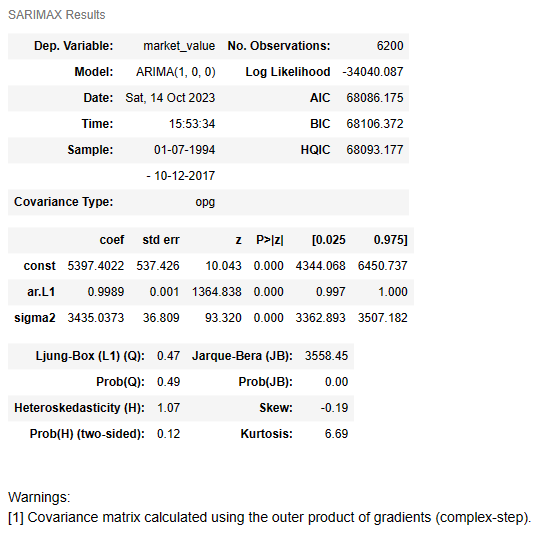

In [ ]:
#  Realizar el 2do Rezago
model_ar_2 = ARIMA(df.market_value, order=(2, 0, 0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

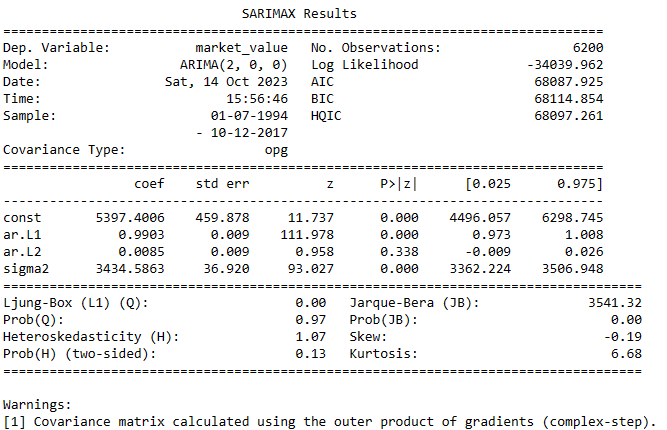

In [ ]:
#  Realizar el 3er Rezago
model_ar_3 = ARIMA(df.market_value, order=(3, 0, 0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

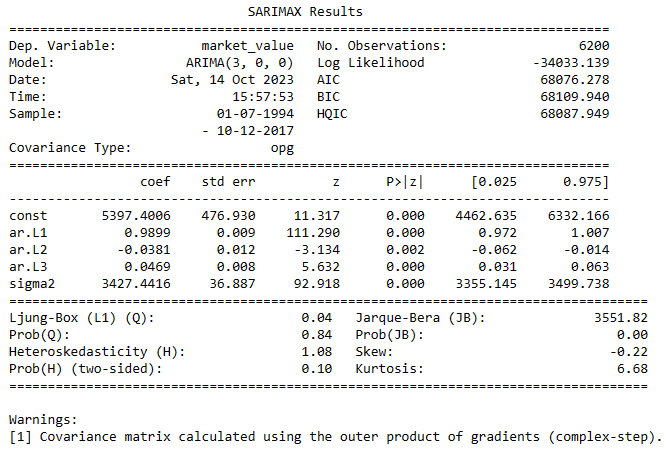

In [ ]:
#  Realizar el 4to Rezago
model_ar_4 = ARIMA(df.market_value, order=(4, 0, 0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())

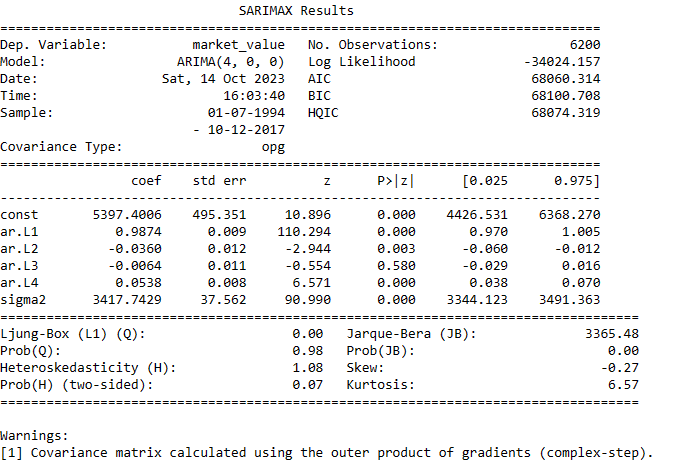

In [ ]:
#  Realizar la Prueba de Diagnostico de Normalidad.
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)

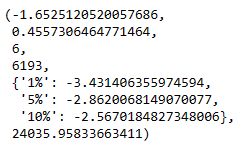

# Sección - N°5

In [ ]:
# Instala la biblioteca gdown si aún no la tienes
!pip install gdown

import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns

# Descarga el archivo CSV desde Google Drive
url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
output = 'Index2018.csv'
gdown.download(url, output, quiet=False)

# Lee el archivo CSV y divide los datos en filas utilizando punto y coma como delimitador
df_comp = pd.read_csv('Index2018.csv', delimiter=';')

# Asegúrate de que la columna 'date' sea tratada como fecha
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

# Resto del código original

# Suprime los warnings
# El siguiente código se encarga de suprimir todas las advertencias generadas en el programa.
# Las advertencias son mensajes informativos que el intérprete de Python emite para alertar
# sobre posibles problemas o cambios en el comportamiento de funciones. Aquí se están ignorando
# todas las advertencias utilizando el módulo 'warnings'.
import warnings
warnings.filterwarnings("ignore")

# Establece la columna "date" como el índice del DataFrame df_comp.
df_comp.set_index("date", inplace=True)
# Reasigna el DataFrame para que tenga una frecuencia de negociación 'b' (días hábiles).
# Esto asegura que haya una fila para cada día hábil en el DataFrame, incluso si no hay datos para ese día.
df_comp = df_comp.asfreq('b')
# Rellena los valores faltantes utilizando el método de relleno hacia adelante (ffill).
# Esto significa que los valores faltantes se completarán con el valor de la fila anterior.
df_comp = df_comp.fillna(method='ffill')


# Crea una nueva columna 'market_value' en el DataFrame df_comp
# y la iguala a los valores de la columna 'ftse'.
df_comp['market_value'] = df_comp['ftse']

# Elimina las columnas 'spx', 'dax', 'ftse' y 'nikkei' del DataFrame df_comp.
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
# Calcula el tamaño de los datos de entrenamiento como el 80% del tamaño total del DataFrame df_comp.
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

def LLR_test(mod_1, mod_2, DF=1):
  # Ajusta el primer modelo (mod_1) y obtiene su log-likelihood.
    L1 = mod_1.fit().llf
    # Ajusta el segundo modelo (mod_2) y obtiene su log-likelihood.
    L2 = mod_2.fit().llf
    # Calcula el estadístico de razón de verosimilitudes (LR).
    LR = (2 * (L2 - L1))
    # Calcula el valor p asociado al estadístico LR utilizando la distribución chi-cuadrado.
    p = chi2.sf(LR, DF).round(3)
    # Devuelve el valor p resultante.
    return p

Downloading...
From: https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv
To: /content/Index2018.csv
100%|██████████| 383k/383k [00:00<00:00, 63.9MB/s]


In [ ]:
# Realiza una prueba de Dickey-Fuller aumentada en la serie de tiempo contenida en la columna 'market_value' de DataFrame 'df'.
sts.adfuller(df['market_value'])

(-1.65251205200554,
 0.45573064647726563,
 6,
 6193,
 {'1%': -3.431406355974594,
  '5%': -2.8620068149070077,
  '10%': -2.5670184827348006},
 67681.61129465637)

In [ ]:
# Calcula los rendimientos diarios de la columna 'market_value' y los almacena en una nueva columna 'returns'.
# Se multiplican por 100 para expresar los rendimientos en porcentaje.
df['returns'] = df['market_value'].pct_change(1).mul(100)
# Elimina la primera fila del DataFrame 'df' (índice 0) ya que los rendimientos no se pueden calcular para el primer día.
# Los rendimientos se calculan como cambios con respecto al día anterior.
df = df.iloc[1:]


In [ ]:
# Realiza una prueba de Dickey-Fuller aumentada en la serie de tiempo de los rendimientos ('returns') del DataFrame 'df'.
sts.adfuller(df['returns'])

(-15.016471321560472,
 1.0372580059357148e-27,
 34,
 6164,
 {'1%': -3.4314113279237977,
  '5%': -2.862009011671878,
  '10%': -2.5670196521269593},
 18855.59403362416)

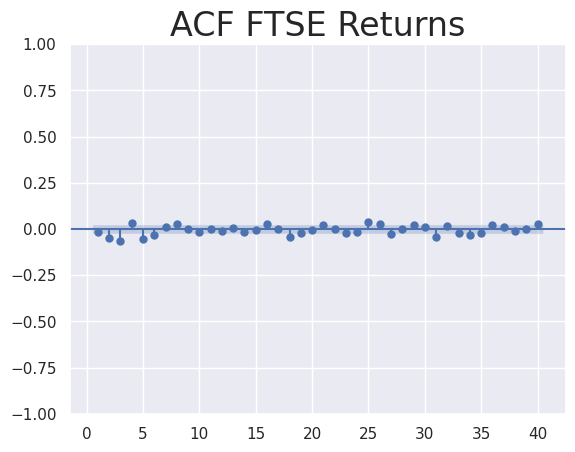

In [ ]:
# Trama el gráfico de la función de autocorrelación (ACF) de la serie de tiempo de los rendimientos ('returns') con un retraso máximo de 40 lags.
# El parámetro 'lags' controla la cantidad de retrasos (lags) que se mostrarán en el gráfico.
# El parámetro 'zero' está configurado en False para omitir el ACF en el retraso cero
sgt.plot_acf(df['returns'], lags=40, zero=False)
# Establece el título del gráfico.
plt.title("ACF FTSE Returns", size=24)
# Muestra el gráfico ACF.
plt.show()

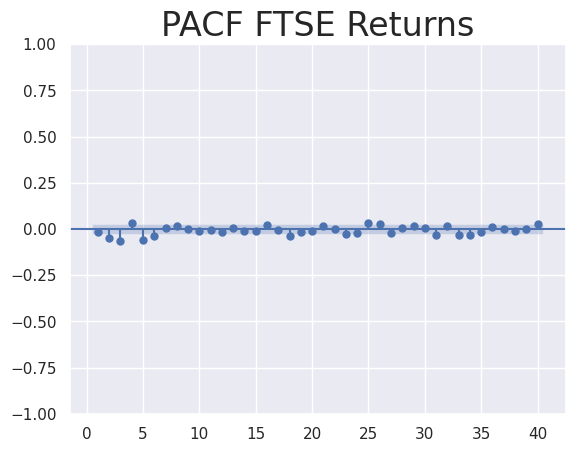

In [ ]:
# Trama el gráfico de la función de autocorrelación parcial (PACF) de la serie de tiempo de los rendimientos ('returns') con un retraso máximo de 40 lags.
# El parámetro 'lags' controla la cantidad de retrasos (lags) que se mostrarán en el gráfico.
# El parámetro 'zero' está configurado en False para omitir el PACF en el retraso cero.
# El parámetro 'method' está configurado en 'ols' para utilizar el método de mínimos cuadrados ordinarios
sgt.plot_pacf(df['returns'], lags=40, zero=False, method='ols')
# Establece el título del gráfico.
plt.title("PACF FTSE Returns", size=24)
# Muestra el gráfico PACF.
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1, 0, 0) para los retornos
# Ajusta un modelo ARIMA(1, 0, 0) a la serie de tiempo de los retornos
model_ret_ar_1 = ARIMA(df['returns'], order=(1, 0, 0))
results_ret_ar_1 = model_ret_ar_1.fit()
# Imprime un resumen del modelo
print("Resumen del Modelo ARIMA(1,0,0) para los retornos:")
print(results_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9511.637
Date:                Sat, 14 Oct 2023   AIC                          19029.274
Time:                        08:14:46   BIC                          19049.471
Sample:                    01-10-1994   HQIC                         19036.276
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.336      0.182      -0.009       0.047
ar.L1         -0.0175      0.008     -2.316      0.021      -0.032      -0.003
s

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos
# Ajusta un modelo ARIMA(2, 0, 0) a la serie de tiempo de los retornos
model_ret_ar_2 = ARIMA(df['returns'], order=(2, 0, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
# Imprime un resumen del modelo
print("Resumen del Modelo ARIMA(2,0,0) para los retornos:")
print(results_ret_ar_2.summary())

Resumen del Modelo ARIMA(2,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9504.351
Date:                Sat, 14 Oct 2023   AIC                          19016.702
Time:                        08:15:09   BIC                          19043.631
Sample:                    01-10-1994   HQIC                         19026.038
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.392      0.164      -0.008       0.046
ar.L1         -0.0184      0.008     -2.401      0.016      -0.033      -0.003
a

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1, 0, 0) para los retornos
# Ajusta un modelo ARIMA(1, 0, 0) a la serie de tiempo de los retornos
model_ret_ar_1 = ARIMA(df['returns'], order=(1, 0, 0))
results_ret_ar_1 = model_ret_ar_1.fit()
# Imprime un resumen del modelo
print("Resumen del Modelo ARIMA(1,0,0) para los retornos:")
print(results_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9511.637
Date:                Sat, 14 Oct 2023   AIC                          19029.274
Time:                        08:15:28   BIC                          19049.471
Sample:                    01-10-1994   HQIC                         19036.276
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.336      0.182      -0.009       0.047
ar.L1         -0.0175      0.008     -2.316      0.021      -0.032      -0.003
s

In [ ]:
# Función para el LLR test
# Define una función llamada LLR_test que compara dos modelos estadísticos mediante el test de razón de verosimilitudes
def LLR_test(mod_1, mod_2, DF=1):
  # Ajusta el primer modelo (mod_1) y obtiene su log-likelihood.
    L1 = mod_1.fit().llf
    # Ajusta el segundo modelo (mod_2) y obtiene su log-likelihood.
    L2 = mod_2.fit().llf
    # Calcula el estadístico de razón de verosimilitudes (LR)
    LR = (2 * (L2 - L1))
    # Calcula el valor p asociado al estadístico LR utilizando la distribución chi-cuadrado
    p = chi2.sf(LR, DF).round(3)
    # Devuelve el valor p resultante.
    return p

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos
model_ret_ar_2 = ARIMA(df['returns'], order=(2, 0, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
print("Resumen del Modelo ARIMA(2,0,0) para los retornos:")
print(results_ret_ar_2.summary())


Resumen del Modelo ARIMA(2,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9504.351
Date:                Sat, 14 Oct 2023   AIC                          19016.702
Time:                        08:16:08   BIC                          19043.631
Sample:                    01-10-1994   HQIC                         19026.038
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.392      0.164      -0.008       0.046
ar.L1         -0.0184      0.008     -2.401      0.016      -0.033      -0.003
a

In [ ]:
# Prueba de razón de verosimilitud entre ARIMA(1,0,0) y ARIMA(2,0,0)
LLR_1_2 = LLR_test(model_ret_ar_1, model_ret_ar_2)
print(f"LLR test entre ARIMA(1,0,0) y ARIMA(2,0,0): {LLR_1_2}")

LLR test entre ARIMA(1,0,0) y ARIMA(2,0,0): 0.0


In [ ]:
# Repite el proceso para modelos ARIMA(3,0,0) a ARIMA(7,0,0)
orders = [3, 4, 5, 6, 7]
for p in orders:
    model_ret_ar = ARIMA(df['returns'], order=(p, 0, 0))
    results_ret_ar = model_ret_ar.fit()
    print(f"Resumen del Modelo ARIMA({p},0,0) para los retornos:")
    print(results_ret_ar.summary())

    if p < 7:
        LLR = LLR_test(ARIMA(df['returns'], order=(p, 0, 0)), ARIMA(df['returns'], order=(p+1, 0, 0)))
        print(f"LLR test entre ARIMA({p},0,0) y ARIMA({p+1},0,0): {LLR}")

Resumen del Modelo ARIMA(3,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9490.170
Date:                Sat, 14 Oct 2023   AIC                          18990.340
Time:                        08:16:50   BIC                          19024.001
Sample:                    01-10-1994   HQIC                         19002.010
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.457      0.145      -0.007       0.045
ar.L1         -0.0217      0.008     -2.775      0.006      -0.037      -0.006
a

Normalizing values

In [ ]:
# Normalización del valor de mercado
benchmark = df['market_value'].iloc[0]
df['norm'] = df['market_value'].div(benchmark).mul(100)

In [ ]:
# Prueba de Dickey-Fuller aumentada para la serie normalizada
sts.adfuller(df['norm'])

(-1.641805223132514,
 0.46131766759330184,
 6,
 6192,
 {'1%': -3.4314065266455214,
  '5%': -2.862006890314898,
  '10%': -2.567018522876271},
 24052.378070390532)

In [ ]:
# Normalización de los retornos
bench_ret = df['returns'].iloc[0]
df['norm_ret'] = df['returns'].div(bench_ret).mul(100)

# Prueba de Dickey-Fuller aumentada para la serie de retornos normalizada
sts.adfuller(df['norm_ret'])

(-15.016471321560552,
 1.0372580059354626e-27,
 34,
 6164,
 {'1%': -3.4314113279237977,
  '5%': -2.862009011671878,
  '10%': -2.5670196521269593},
 98476.7791580395)

Normalized Returns

In [ ]:
# Modelo ARIMA(1, 0, 0) para los retornos normalizados
model_norm_ret_ar_1 = ARIMA(df['norm_ret'], order=(1, 0, 0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
print("Resumen del Modelo ARIMA(1,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -49548.279
Date:                Sat, 14 Oct 2023   AIC                          99102.559
Time:                        08:19:00   BIC                          99122.755
Sample:                    01-10-1994   HQIC                         99109.561
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      9.061     -1.336      0.182     -29.865       5.653
ar.L1         -0.0176      0.008     -2.316      0.021      -0.032 

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos normalizados
model_norm_ret_ar_2 = ARIMA(df['norm_ret'], order=(2, 0, 0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
print("Resumen del Modelo ARIMA(2,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_2.summary())

Resumen del Modelo ARIMA(2,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -49540.994
Date:                Sat, 14 Oct 2023   AIC                          99089.987
Time:                        08:19:19   BIC                          99116.916
Sample:                    01-10-1994   HQIC                         99099.323
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.702     -1.391      0.164     -29.161       4.949
ar.L1         -0.0184      0.008     -2.399      0.016      -0.033 

In [ ]:
# Modelo ARIMA(7, 0, 0) para los retornos normalizados
model_norm_ret_ar_7 = ARIMA(df['norm_ret'], order=(7, 0, 0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
print("Resumen del Modelo ARIMA(7,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_7.summary())

Resumen del Modelo ARIMA(7,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -49509.348
Date:                Sat, 14 Oct 2023   AIC                          99036.696
Time:                        08:19:46   BIC                          99097.285
Sample:                    01-10-1994   HQIC                         99057.702
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.058     -1.502      0.133     -27.899       3.687
ar.L1         -0.0197      0.008     -2.401      0.016      -0.036 

Analysing the Residuals

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(6, 0, 0) para los retornos normalizados
model_ret_ar_6 = ARIMA(df['norm_ret'], order=(6, 0, 0))
results_ret_ar_6 = model_ret_ar_6.fit()

In [ ]:
# Cálculo de los residuos
df['res_ret'] = results_ret_ar_6.resid


In [ ]:
# Media de los residuos
mean_res_ret = df['res_ret'].mean()
print(f"Media de los residuos: {mean_res_ret}")

Media de los residuos: 0.010974259831374277


In [ ]:
# Varianza de los residuos
var_res_ret = df['res_ret'].var()
print(f"Varianza de los residuos: {var_res_ret}")

Varianza de los residuos: 506701.7324967502


In [ ]:
# Prueba de Dickey-Fuller aumentada para los residuos
adf_res_ret = sts.adfuller(df['res_ret'])
print("Resultado de la Prueba de Dickey-Fuller Aumentada para los residuos:")
print(adf_res_ret)

Resultado de la Prueba de Dickey-Fuller Aumentada para los residuos:
(-14.8707826133391, 1.664626274550529e-27, 34, 6164, {'1%': -3.4314113279237977, '5%': -2.862009011671878, '10%': -2.5670196521269593}, 98478.50557872414)


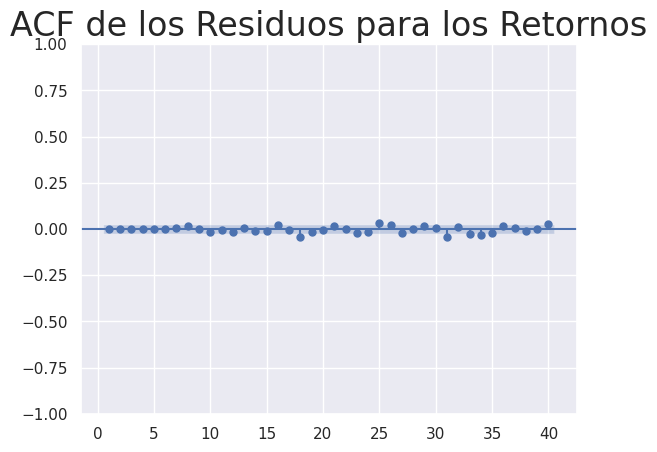

In [ ]:
# Gráfico de la función de autocorrelación de los residuos
sgt.plot_acf(df['res_ret'], zero=False, lags=40)
plt.title("ACF de los Residuos para los Retornos", size=24)
plt.show()

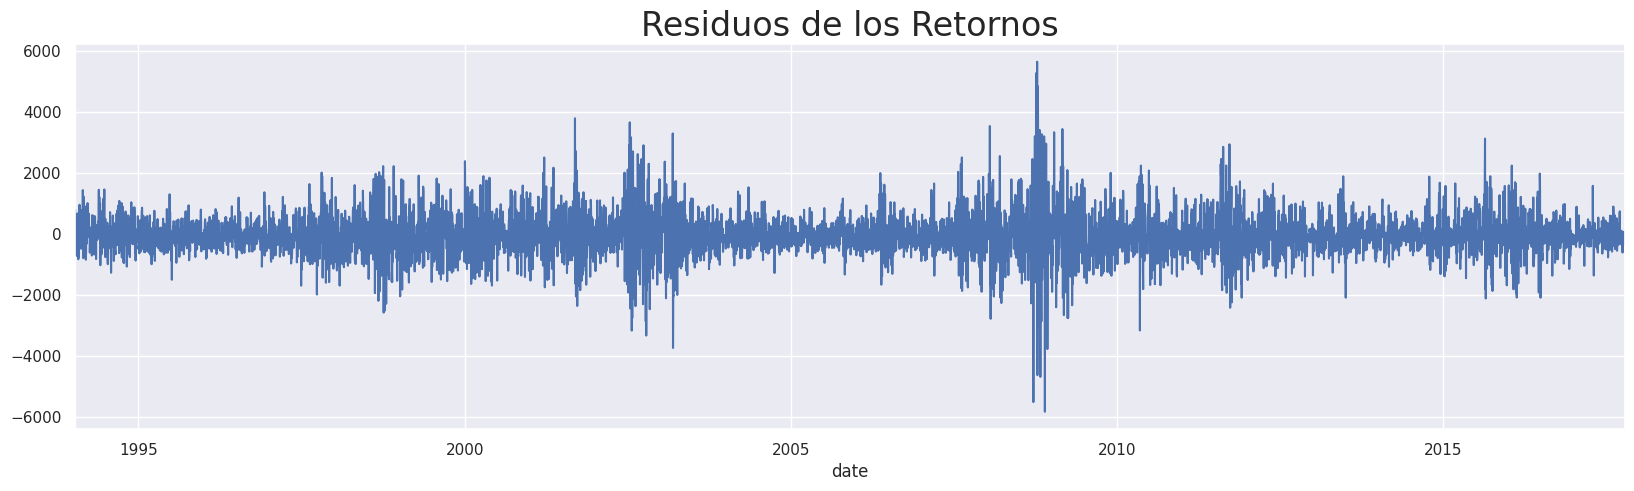

In [ ]:
# Gráfico de los residuos
df['res_ret'].plot(figsize=(20, 5))
plt.title("Residuos de los Retornos", size=24)
plt.show()

# Sección - N°6

Importar los paquetes correspondientes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns

sns.set()


Importación de datos y tratamiento previo

In [ ]:
#Procedemos a importar los datos
# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)

df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

Carga exitosa del archivo CSV.


In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

La prueba LLR

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Creación de devoluciones

In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

ACF para devoluciones

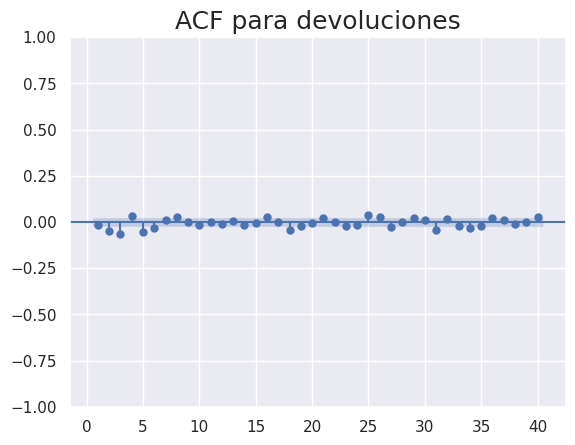

In [ ]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF para devoluciones", size=18)
plt.show()

MA(1) para devoluciones

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_01 = ARIMA(df.returns[1:], order=(0, 0, 1))
results_ret_arma_01 = model_ret_arma_01.fit()
print(results_ret_arma_01.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9511.532
Date:                Sat, 14 Oct 2023   AIC                          19029.064
Time:                        13:00:28   BIC                          19049.260
Sample:                    01-10-1994   HQIC                         19036.066
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.338      0.181      -0.009       0.047
ma.L1         -0.0195      0.008     -2.575      0.010      -0.034      -0.005
sigma2         1.2596      0.011    112.024      0.0

Modelos MA de mayor retardo para los rendimientos

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_3 = ARIMA(df.returns[1:], order=(0, 0, 3))
results_ret_arma_3 = model_ret_arma_3.fit()
print(results_ret_arma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -9487.722
Date:                Sat, 14 Oct 2023   AIC                          18985.443
Time:                        13:01:46   BIC                          19019.104
Sample:                    01-10-1994   HQIC                         18997.113
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.481      0.139      -0.006       0.044
ma.L1         -0.0175      0.008     -2.274      0.023      -0.033      -0.002
ma.L2         -0.0539      0.007     -7.625      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_4 = ARIMA(df.returns[1:], order=(0, 0, 4))
results_ret_arma_4 = model_ret_arma_4.fit()
print(results_ret_arma_4.summary())

p_value = LLR_test(model_ret_arma_3, model_ret_arma_4)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -9484.757
Date:                Sat, 14 Oct 2023   AIC                          18981.514
Time:                        13:02:22   BIC                          19021.907
Sample:                    01-10-1994   HQIC                         18995.519
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.434      0.152      -0.007       0.045
ma.L1         -0.0169      0.008     -2.128      0.033      -0.033      -0.001
ma.L2         -0.0540      0.007     -7.536      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_5 = ARIMA(df.returns[1:], order=(0, 0, 5))
results_ret_arma_5 = model_ret_arma_5.fit()
print(results_ret_arma_5.summary())

p_value = LLR_test(model_ret_arma_4, model_ret_arma_5)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -9477.050
Date:                Sat, 14 Oct 2023   AIC                          18968.100
Time:                        13:03:15   BIC                          19015.225
Sample:                    01-10-1994   HQIC                         18984.438
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.490      0.136      -0.006       0.044
ma.L1         -0.0214      0.008     -2.629      0.009      -0.037      -0.005
ma.L2         -0.0493      0.007     -6.858      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_arma_6 = ARIMA(df.returns[1:], order=(0, 0, 6))
results_ret_arma_6 = model_ret_arma_6.fit()
print(results_ret_arma_6.summary())

p_value = LLR_test(model_ret_arma_5, model_ret_arma_6)
print("\nLLR test p-value =", p_value)

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -9474.322
Date:                Sat, 14 Oct 2023   AIC                          18964.643
Time:                        13:04:10   BIC                          19018.500
Sample:                    01-10-1994   HQIC                         18983.315
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.522      0.128      -0.005       0.043
ma.L1         -0.0194      0.008     -2.384      0.017      -0.035      -0.003
ma.L2         -0.0486      0.007     -6.732      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARMA(0,7)
model_ret_arma_7 = ARIMA(df.returns[1:], order=(0, 0, 7))
results_ret_arma_7 = model_ret_arma_7.fit()

# Obtener el resumen del modelo ARMA(0,7)
print(results_ret_arma_7.summary())

# Realizar el test LLR entre model_ret_arma_7 y model_ret_arma_8
p_value = LLR_test(model_ret_arma_7, model_ret_arma_8)
print("\nLLR test p-value =", p_value)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -9474.133
Date:                Sat, 14 Oct 2023   AIC                          18966.265
Time:                        13:06:09   BIC                          19026.855
Sample:                    01-10-1994   HQIC                         18987.272
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.505      0.132      -0.006       0.044
ma.L1         -0.0201      0.008     -2.449      0.014      -0.036      -0.004
ma.L2         -0.0490      0.007     -6.765      0.0

In [ ]:
p_value = LLR_test(model_ret_arma_6, model_ret_arma_8, DF=2)
print("\nLLR test p-value =", p_value)


LLR test p-value = 0.103


Residuos de los rendimientos

In [ ]:
df['res_ret_arma_8'] = results_ret_arma_8.resid[1:]

In [ ]:
print("The mean of the residuals is " + str(round(df.res_ret_arma_8.mean(), 3)))
print ("The variance of the residuals is " + str(round(df.res_ret_arma_8.var(), 3)))



The mean of the residuals is -0.0
The variance of the residuals is 1.244


In [ ]:
round(sqrt(df.res_ret_arma_8.var()), 3)


1.115

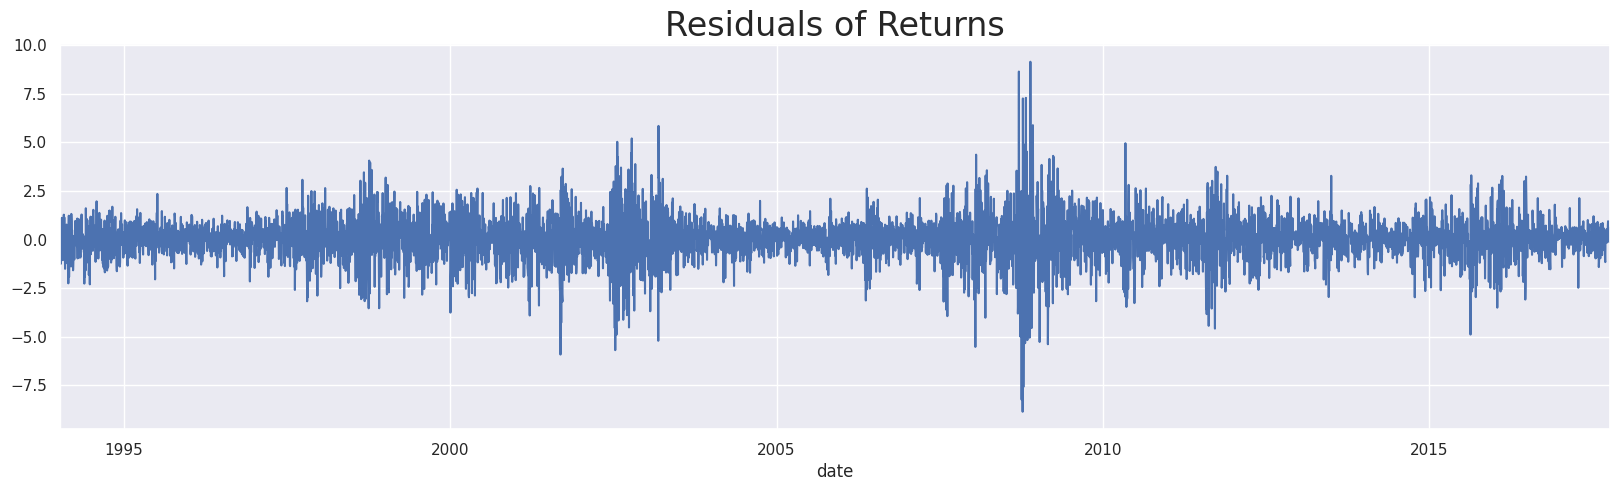

In [ ]:
df.res_ret_arma_8[1:].plot(figsize=(20, 5))
plt.title("Residuals of Returns", size=24)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Aplicar el test ADF a los residuos
result = adfuller(df.res_ret_arma_8[2:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

#El test ADF se utiliza para determinar si una serie temporal es estacionaria o no
#Si el valor del estadístico ADF es menor que los valores críticos y el valor p es lo suficientemente bajo.

ADF Statistic: -78.71853111065616
p-value: 0.0
Critical Values:
1%: -3.431405673841931
5%: -2.862006513518873
10%: -2.567018322298507


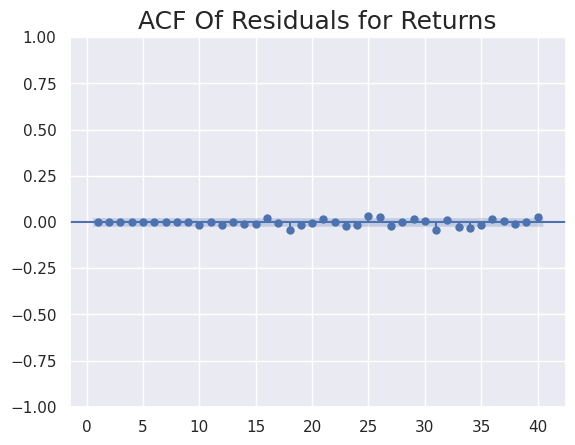

In [ ]:
import statsmodels.api as sm

# Calcular y trazar la ACF de los residuos
sgt.plot_acf(df.res_ret_arma_8[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=18)
plt.show()


Rendimientos Normalizados



In [ ]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)


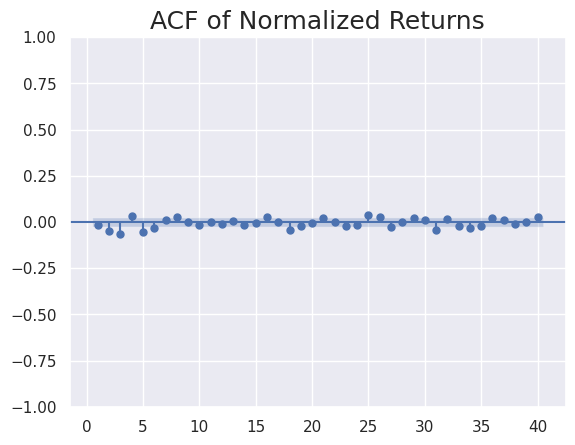

In [ ]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=18)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_norm_ret_arma_8 = ARIMA(df.norm_ret[1:], order=(0, 0, 8))
results_norm_ret_arma_8 = model_norm_ret_arma_8.fit()
print(results_norm_ret_arma_8.summary())


                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -49508.699
Date:                Sat, 14 Oct 2023   AIC                          99037.397
Time:                        13:16:44   BIC                          99104.719
Sample:                    01-10-1994   HQIC                         99060.737
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.311     -1.457      0.145     -28.395       4.183
ma.L1         -0.0197      0.008     -2.373      0.018      -0.036      -0.003
ma.L2         -0.0491      0.007     -6.731      0.0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_norm_ret_arma_8 = ARIMA(df.norm_ret[1:], order=(0, 0, 8))
results_norm_ret_arma_8 = model_norm_ret_arma_8.fit()
print(results_norm_ret_arma_8.summary())


                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -49508.699
Date:                Sat, 14 Oct 2023   AIC                          99037.397
Time:                        13:17:18   BIC                          99104.719
Sample:                    01-10-1994   HQIC                         99060.737
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.311     -1.457      0.145     -28.395       4.183
ma.L1         -0.0197      0.008     -2.373      0.018      -0.036      -0.003
ma.L2         -0.0491      0.007     -6.731      0.0

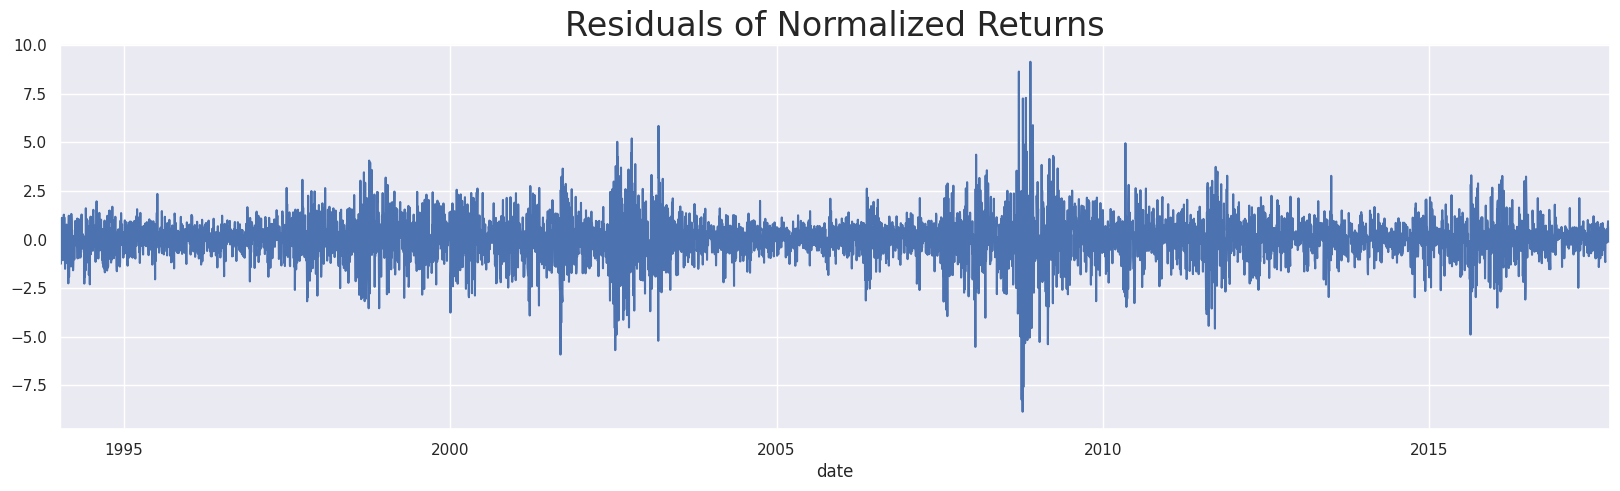

In [ ]:
df['res_ret_arma_8'][1:].plot(figsize=(20, 5))
plt.title("Residuals of Normalized Returns", size=24)
plt.show()


# Sección - N°7

In [ ]:
#Procedemos a importar los paquetes correspondientes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
#Importación de datos y tratamiento previo
#Procedemos a importar los datos
# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)

df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

Carga exitosa del archivo CSV.


In [ ]:
df_comp['market_value'] = df_comp['ftse']

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#La prueba LLR
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
#Creación de retornos
df['returns'] = df.market_value.pct_change(1)*100

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Definir el modelo ARMA(1,1)
model_ret_ar_1_ma_1 = sm.tsa.SARIMAX(df['returns'][1:], order=(1,0,1))

# Ajustar el modelo
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()

# Mostrar el resumen
print(results_ret_ar_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -9497.888
Date:                Sat, 14 Oct 2023   AIC                          19001.776
Time:                        20:46:05   BIC                          19021.972
Sample:                    01-10-1994   HQIC                         19008.778
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8089      0.036     22.771      0.000       0.739       0.879
ma.L1         -0.8506      0.031    -27.031      0.000      -0.912      -0.789
sigma2         1.2541      0.011    110.298      0.0

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Definir el modelo ARMA(1,0)
model_ret_ar_1 = sm.tsa.SARIMAX(df['returns'][1:], order=(1,0,0))

# Ajustar el modelo ARMA(1,0)
results_ret_ar_1 = model_ret_ar_1.fit()

# Mostrar el resumen del modelo ARMA(1,0)
print("ARMA(1,0) Model Summary:")
print(results_ret_ar_1.summary())

# Definir el modelo ARMA(0,1)
model_ret_ma_1 = sm.tsa.SARIMAX(df['returns'][1:], order=(0,0,1))

# Ajustar el modelo ARMA(0,1)
results_ret_ma_1 = model_ret_ma_1.fit()

# Mostrar el resumen del modelo ARMA(0,1)
print("\nARMA(0,1) Model Summary:")
print(results_ret_ma_1.summary())


ARMA(1,0) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -9512.554
Date:                Sat, 14 Oct 2023   AIC                          19029.107
Time:                        20:46:05   BIC                          19042.571
Sample:                    01-10-1994   HQIC                         19033.775
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.007     -2.305      0.021      -0.032      -0.003
sigma2         1.2601      0.011    112.080      0.000       1.238       1.282
Ljung-Box (L1) (Q):        

In [ ]:
import statsmodels.api as sm

# Definir el modelo ARMA(3,3)
model_ret_ar_3_ma_3 = sm.tsa.SARIMAX(df['returns'][1:], order=(3,0,3))

# Ajustar el modelo ARMA(3,3)
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()


In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(3,1)
model_ret_ar_3_ma_1 = sm.tsa.SARIMAX(df['returns'][1:], order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()

# Mostrar el resumen del modelo ARMA(3,1)
print("ARMA(3,1) Model Summary:")
print(results_ret_ar_3_ma_1.summary())

ARMA(3,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -9485.558
Date:                Sat, 14 Oct 2023   AIC                          18981.115
Time:                        20:46:15   BIC                          19014.776
Sample:                    01-10-1994   HQIC                         18992.785
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5115      0.067     -7.607      0.000      -0.643      -0.380
ar.L2         -0.0583      0.008     -7.271      0.000      -0.074      -0.043
ar.L3         -0.0931      

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(2,3)
model_ret_ar_2_ma_3 = sm.tsa.SARIMAX(df['returns'][1:], order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()

# Mostrar el resumen del modelo ARMA(2,3)
print("ARMA(2,3) Model Summary:")
print(results_ret_ar_2_ma_3.summary())

ARMA(2,3) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -9483.265
Date:                Sat, 14 Oct 2023   AIC                          18978.531
Time:                        20:46:17   BIC                          19018.923
Sample:                    01-10-1994   HQIC                         18992.535
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5391      0.070     -7.669      0.000      -0.677      -0.401
ar.L2         -0.1049      0.077     -1.363      0.173      -0.256       0.046
ma.L1          0.5207      

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(2,2)
model_ret_ar_2_ma_2 = sm.tsa.SARIMAX(df['returns'][1:], order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()

# Mostrar el resumen del modelo ARMA(2,2)
print("ARMA(2,2) Model Summary:")
print(results_ret_ar_2_ma_2.summary())

ARMA(2,2) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -9496.905
Date:                Sat, 14 Oct 2023   AIC                          19003.810
Time:                        20:46:20   BIC                          19037.471
Sample:                    01-10-1994   HQIC                         19015.480
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0697      0.101     -0.692      0.489      -0.267       0.128
ar.L2          0.7365      0.078      9.497      0.000       0.585       0.889
ma.L1          0.0227      

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(1,3)
model_ret_ar_1_ma_3 = sm.tsa.SARIMAX(df['returns'][1:], order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()

# Mostrar el resumen del modelo ARMA(1,3)
print("ARMA(1,3) Model Summary:")
print(results_ret_ar_1_ma_3.summary())

ARMA(1,3) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(1, 0, 3)   Log Likelihood               -9483.381
Date:                Sat, 14 Oct 2023   AIC                          18976.761
Time:                        20:46:22   BIC                          19010.422
Sample:                    01-10-1994   HQIC                         18988.431
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4762      0.064     -7.394      0.000      -0.602      -0.350
ma.L1          0.4581      0.065      7.064      0.000       0.331       0.585
ma.L2         -0.0606      

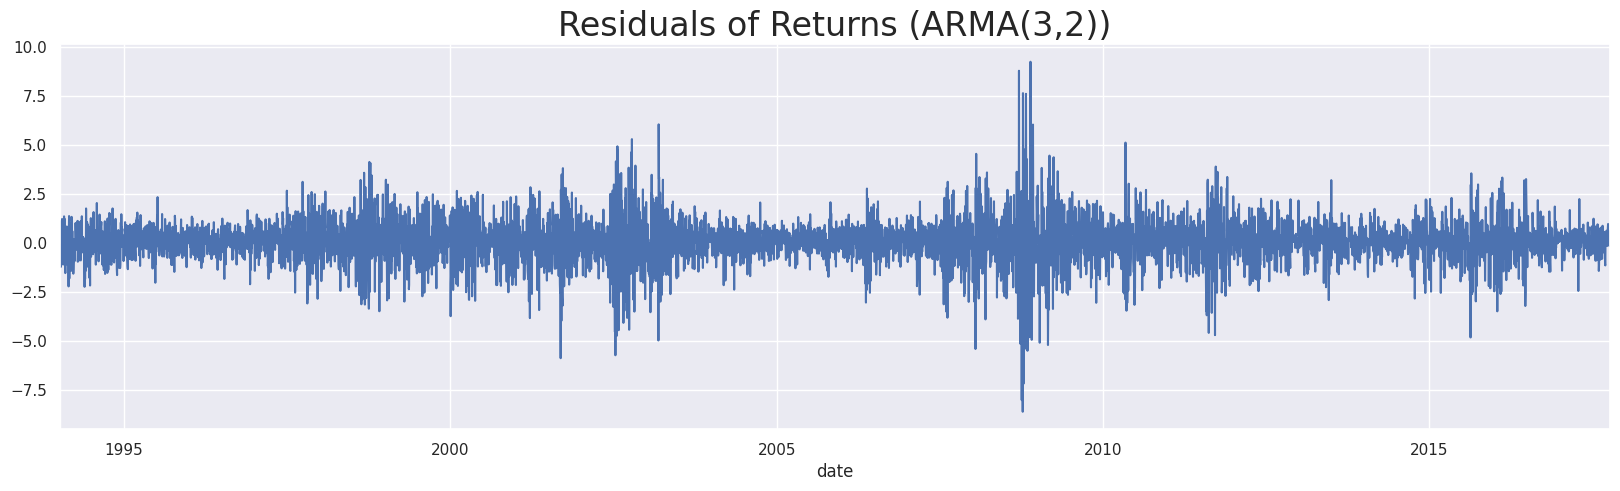

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajustar el modelo ARMA(3,2)
model_ret_ar_3_ma_2 = sm.tsa.SARIMAX(df['returns'][1:], order=(3, 0, 2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()

# Agregar los residuos al DataFrame df
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid

# Graficar los residuos
df['res_ret_ar_3_ma_2'].plot(figsize=(20, 5))
plt.title("Residuals of Returns (ARMA(3,2))", size=24)
plt.show()

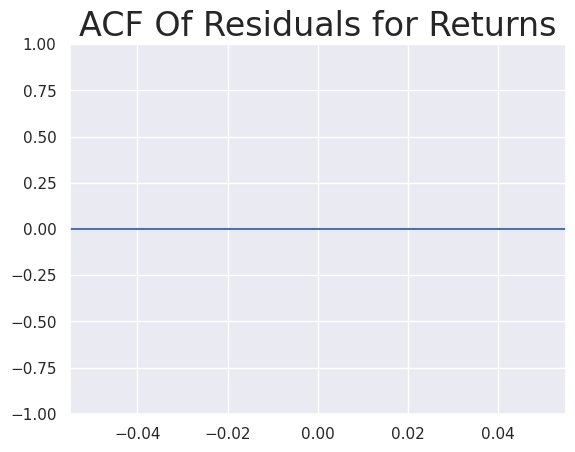

In [ ]:
sgt.plot_acf(df.res_ret_ar_3_ma_2, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

In [ ]:
import statsmodels.api as sm
# Ajustar el modelo ARMA(5,5)
model_ret_ar_5_ma_5 = sm.tsa.SARIMAX(df['returns'][1:], order=(5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()

# Mostrar el resumen del modelo ARMA(5,5)
print(results_ret_ar_5_ma_5.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -9470.121
Date:                Sat, 14 Oct 2023   AIC                          18962.241
Time:                        20:58:10   BIC                          19036.295
Sample:                    01-10-1994   HQIC                         18987.915
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0812      0.127     -0.638      0.524      -0.331       0.168
ar.L2         -0.4119      0.072     -5.746      0.000      -0.552      -0.271
ar.L3         -0.0098      0.064     -0.154      0.8

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(5,1)
model_ret_ar_5_ma_1 = sm.tsa.SARIMAX(df['returns'][1:], order=(5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()

# Mostrar el resumen del modelo ARMA(5,1)
print(results_ret_ar_5_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -9475.713
Date:                Sat, 14 Oct 2023   AIC                          18965.427
Time:                        20:59:04   BIC                          19012.552
Sample:                    01-10-1994   HQIC                         18981.765
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3144      0.103      3.048      0.002       0.112       0.516
ar.L2         -0.0455      0.008     -5.548      0.000      -0.062      -0.029
ar.L3         -0.0536      0.009     -5.885      0.0

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(1,5)
model_ret_ar_1_ma_5 = sm.tsa.SARIMAX(df['returns'][1:], order=(1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()

# Mostrar el resumen del modelo ARMA(1,5)
print(results_ret_ar_1_ma_5.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -9476.798
Date:                Sat, 14 Oct 2023   AIC                          18967.597
Time:                        20:59:39   BIC                          19014.722
Sample:                    01-10-1994   HQIC                         18983.935
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2943      0.123      2.398      0.016       0.054       0.535
ma.L1         -0.3140      0.123     -2.551      0.011      -0.555      -0.073
ma.L2         -0.0423      0.008     -5.044      0.0

In [ ]:
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ", results_ret_ar_1_ma_5.llf, "\t AIC = ", results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -9475.71336929721 	 AIC =  18965.42673859442
ARMA(1,5):  	 LL =  -9476.798366207782 	 AIC =  18967.596732415564


In [ ]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)


ARMA(3,2):  	 LL =  -9484.34616455168 	 AIC =  18980.69232910336


In [ ]:
#Residuos del nuevo modelo
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

In [ ]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

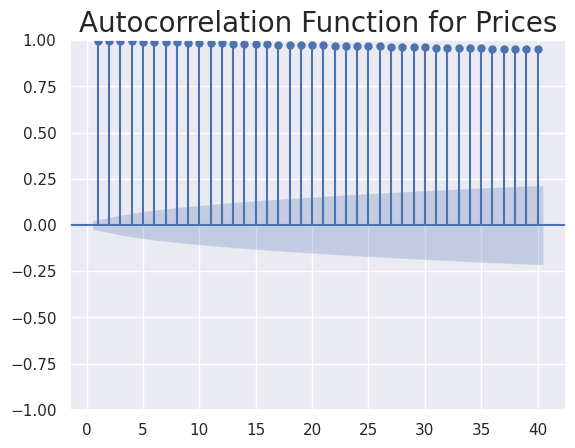

In [ ]:
#Modelos ARMA de precios
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

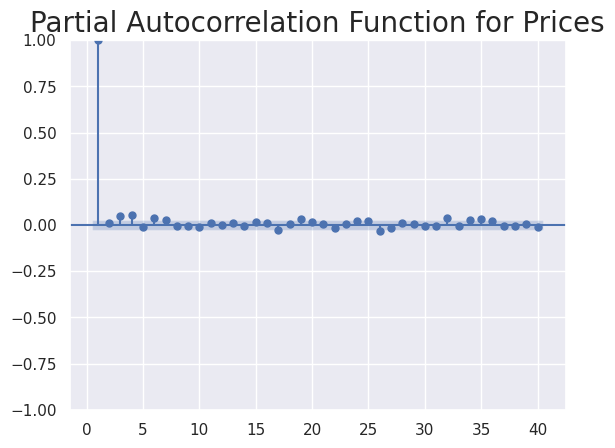

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(1,1)
model_ar_1_ma_1 = sm.tsa.SARIMAX(df['market_value'], order=(1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()

# Mostrar el resumen del modelo ARMA(1,1)
print(results_ar_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -34042.436
Date:                Sat, 14 Oct 2023   AIC                          68090.873
Time:                        21:04:33   BIC                          68111.070
Sample:                    01-07-1994   HQIC                         68097.875
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   9852.065      0.000       1.000       1.000
ma.L1         -0.0100      0.009     -1.139      0.255      -0.027       0.007
sigma2      3436.0493     36.781     93.419      0.0

In [ ]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

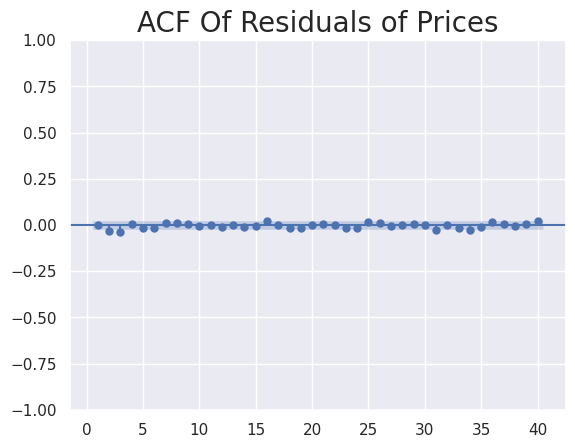

In [ ]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(6,6)
model_ar_6_ma_6 = sm.tsa.SARIMAX(df['market_value'], order=(6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags=11)

# Mostrar el resumen del modelo ARMA(6,6)
print(results_ar_6_ma_6.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(6, 0, 6)   Log Likelihood              -34027.057
Date:                Sat, 14 Oct 2023   AIC                          68080.113
Time:                        21:06:25   BIC                          68167.633
Sample:                    01-07-1994   HQIC                         68110.456
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1994      0.160     -7.511      0.000      -1.512      -0.886
ar.L2         -0.6908      0.114     -6.068      0.000      -0.914      -0.468
ar.L3          0.0589      0.054      1.098      0.2

In [ ]:
import statsmodels.api as sm

# Ajustar el modelo ARMA(5,6)
model_ar_5_ma_6 = sm.tsa.SARIMAX(df['market_value'], order=(5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags=7)

# Mostrar el resumen del modelo ARMA(5,6)
print(results_ar_5_ma_6.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:               SARIMAX(5, 0, 6)   Log Likelihood              -34024.139
Date:                Sat, 14 Oct 2023   AIC                          68072.279
Time:                        21:08:03   BIC                          68153.066
Sample:                    01-07-1994   HQIC                         68100.287
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4761      0.117    -12.582      0.000      -1.706      -1.246
ar.L2         -0.6367      0.105     -6.036      0.000      -0.843      -0.430
ar.L3          0.9665      0.050     19.407      0.0

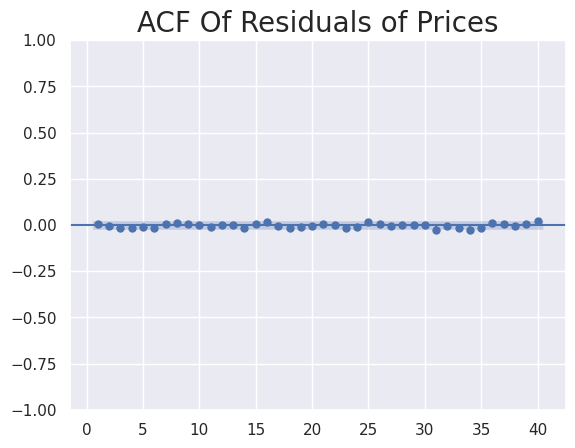

In [ ]:
# Agrega los residuos al DataFrame
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid

# Plotea la función de autocorrelación (ACF) de los residuos
sgt.plot_acf(df['res_ar_5_ma_6'], zero=False, lags=40)
plt.title("ACF Of Residuals of Prices", size=20)
plt.show()


# Sección - N°8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from math import sqrt
import seaborn as sns
sns.set()

# Importación de los datos y preprocesamiento
raw_csv_data = pd.read_csv("https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv", delimiter=';')
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp['ftse']

# Si deseas eliminar algunas columnas, puedes hacerlo aquí
# del df_comp['spx']
# del df_comp['dax']
# del df_comp['ftse']
# del df_comp['nikkei']

size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]


In [ ]:
from scipy.stats.distributions import chi2

# Función para realizar el LLR Test
def LLR_test(mod_1, mod_2, DF=1):
    # Calcula la log-verosimilitud del primer modelo
    L1 = mod_1.llf
    # Calcula la log-verosimilitud del segundo modelo
    L2 = mod_2.llf
    # Calcula la estadística de prueba LR
    LR = 2 * (L2 - L1)
    # Calcula el valor p usando la distribución chi-cuadrado
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
# Crear la columna 'returns' que contiene los retornos
df['returns'] = df['market_value'].pct_change(1) * 100

<ipython-input-9-75052db7078a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1) * 100


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = ARIMA(df['market_value'], order=(1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()

# Muestra el resumen del modelo
print(results_ar_1_i_1_ma_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34020.588
Date:                Sat, 14 Oct 2023   AIC                          68047.175
Time:                        15:37:29   BIC                          68067.372
Sample:                    01-07-1994   HQIC                         68054.177
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8295      0.042     19.888      0.000       0.748       0.911
ma.L1         -0.8645      0.037    -23.250      0.000      -0.937      -0.792
sigma2      3422.8807     36.787     93.045      0.0

<ipython-input-11-d87e78ecd551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


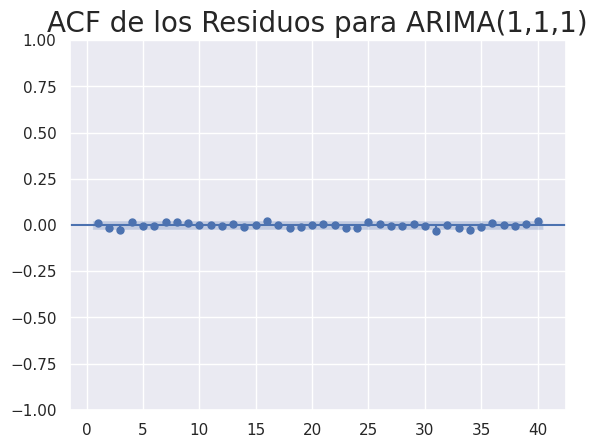

In [ ]:
# Calcula los residuos del modelo ARIMA(1,1,1) y guárdalos en una nueva columna
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

# Grafica la función de autocorrelación de los residuos
sgt.plot_acf(df['res_ar_1_i_1_ma_1'], zero=False, lags=40)
plt.title("ACF de los Residuos para ARIMA(1,1,1)", size=20)
plt.show()

<ipython-input-12-bfd1411dcacb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


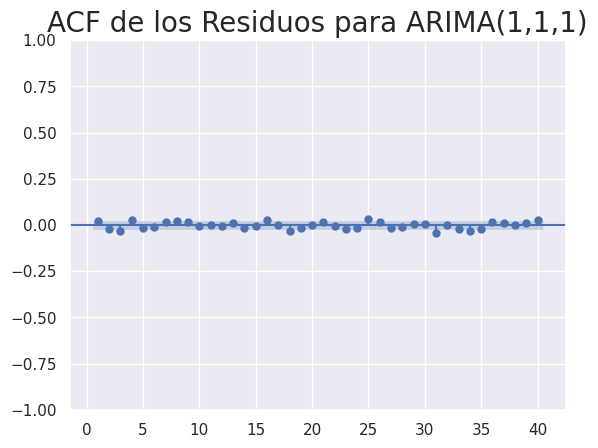

In [ ]:
# Asigna los residuos del modelo ARIMA(1,1,1) a la columna 'res_ar_1_i_1_ma_1'
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

# Grafica la función de autocorrelación de los residuos, excluyendo el primer valor
sgt.plot_acf(df['res_ar_1_i_1_ma_1'][1:], zero=False, lags=40)
plt.title("ACF de los Residuos para ARIMA(1,1,1)", size=20)
plt.show()

In [ ]:
# Modelos ARIMA
model_ar_1_i_1_ma_2 = ARIMA(df['market_value'], order=(1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df['market_value'], order=(1, 1, 3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df['market_value'], order=(2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df['market_value'], order=(3, 1, 1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df['market_value'], order=(3, 1, 2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

# Mostrar LL y AIC de los modelos
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,1,1):  	 LL =  -34020.587627162895 	 AIC =  68047.17525432579
ARIMA(1,1,2):  	 LL =  -34016.57976417375 	 AIC =  68041.1595283475
ARIMA(1,1,3):  	 LL =  -34013.87447333704 	 AIC =  68037.74894667408
ARIMA(2,1,1):  	 LL =  -34016.423329244426 	 AIC =  68040.84665848885
ARIMA(3,1,1):  	 LL =  -34015.37154381574 	 AIC =  68040.74308763148
ARIMA(3,1,2):  	 LL =  -34013.78203720544 	 AIC =  68039.56407441088


In [ ]:
# Función para realizar un LLR test
# Define una función llamada LLR_test que compara dos modelos estadísticos mediante el test de razón de verosimilitudes
def LLR_test(mod_1, mod_2):
  # Calcula el log-likelihood del primer modelo (mod_1).
    L1 = mod_1.llf
    # Calcula el log-likelihood del segundo modelo (mod_2)
    L2 = mod_2.llf
    # Calcula el estadístico de razón de verosimilitudes (LR).
    LR = 2 * (L2 - L1)
    # Calcula el valor p asociado al estadístico LR utilizando la distribución chi-cuadrado con 1 grado de libertad
    p = chi2.sf(LR, 1).round(3)
    # Devuelve el valor p resultante.
    return p

# Realizar el LLR test y mostrar el p-valor
p_value = LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)
print("\nLLR test p-value = " + str(p_value))


LLR test p-value = 0.02


In [ ]:
# Función para realizar un LLR test con DF específico
def LLR_test(mod_1, mod_2, DF):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    return p

# Realizar el LLR test con DF específico y mostrar el p-valor
p_value = LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF=2)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.001


<ipython-input-16-8150ed304844>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid


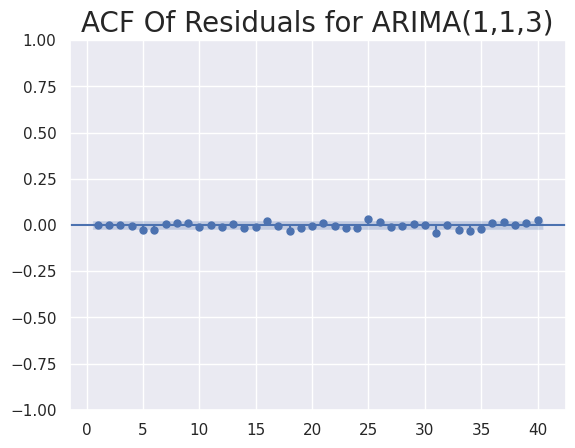

In [ ]:
# Calcular los residuos del modelo ARIMA(1,1,3)
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid

# Trazar la función de autocorrelación (ACF) de los residuos
sgt.plot_acf(df['res_ar_1_i_1_ma_3'][1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [ ]:
# Modelo ARIMA(5,1,1)
order_ar_5_i_1_ma_1 = (5, 1, 1)
model_ar_5_i_1_ma_1 = ARIMA(df['market_value'], order=order_ar_5_i_1_ma_1)
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_params=None)

# Modelo ARIMA(6,1,3)
order_ar_6_i_1_ma_3 = (6, 1, 3)
model_ar_6_i_1_ma_3 = ARIMA(df['market_value'], order=order_ar_6_i_1_ma_3)
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_params=None)


In [ ]:
print(results_ar_5_i_1_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -34009.666
Date:                Sat, 14 Oct 2023   AIC                          68033.332
Time:                        15:40:19   BIC                          68080.457
Sample:                    01-07-1994   HQIC                         68049.670
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3630      0.161      2.253      0.024       0.047       0.679
ar.L2         -0.0456      0.009     -4.841      0.000      -0.064      -0.027
ar.L3         -0.0385      0.012     -3.217      0.0

In [ ]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)


ARIMA(1,1,3):  	 LL =  -34013.87447333704 	 AIC =  68037.74894667408
ARIMA(5,1,1):  	 LL =  -34009.6659543033 	 AIC =  68033.3319086066
ARIMA(6,1,3):  	 LL =  -34008.23792942143 	 AIC =  68036.47585884287


In [ ]:
# Calcular el p-valor del LLR test
p_value = LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF=5)
print("\nLLR test p-value = " + str(p_value))


LLR test p-value = 0.046


In [ ]:
# Calcular el p-valor del LLR test
p_value = LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF=3)
print("\nLLR test p-value = " + str(p_value))



LLR test p-value = 0.414


<ipython-input-22-eaf866ee8156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid


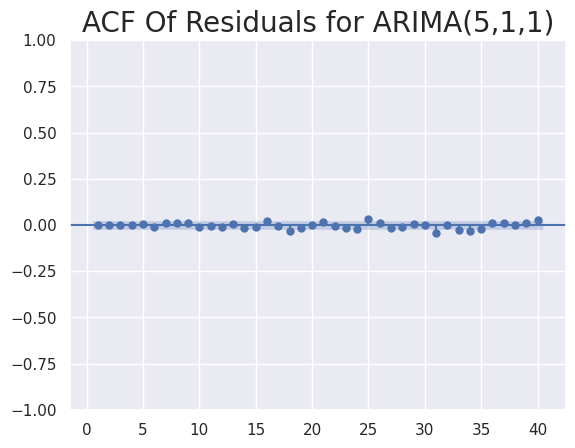

In [ ]:
# Calcular los residuos del modelo ARIMA(5,1,1)
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid

# Trazar la ACF de los residuos
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

In [ ]:
# Calcular las diferencias de primer orden
df['delta_prices'] = df.market_value.diff(1)

# Modelo ARIMA(1,0,1) para las diferencias
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()

# Mostrar el resumen del modelo
print(results_delta_ar_1_i_1_ma_1.summary())

<ipython-input-23-6b221cb8a00f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_prices'] = df.market_value.diff(1)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:           delta_prices   No. Observations:                 6199
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34019.961
Date:                Sat, 14 Oct 2023   AIC                          68047.922
Time:                        15:41:59   BIC                          68074.851
Sample:                    01-10-1994   HQIC                         68057.258
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6606      0.657      1.006      0.315      -0.627       1.948
ar.L1          0.8348      0.040     20.675      0.000       0.756       0.914
ma.L1         -0.8696      0.036    -24.087      0.0

In [ ]:
# Realizar la prueba de Dickey-Fuller aumentada en la serie de diferencias de primer orden
adf_result = sts.adfuller(df.delta_prices[1:])
print(adf_result)

(-35.43397970574891, 0.0, 5, 6193, {'1%': -3.431406355974594, '5%': -2.8620068149070077, '10%': -2.5670184827348006}, 67672.58722872188)


In [ ]:
# Modelo ARIMA(1,2,1)
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()

# Mostrar el resumen del modelo
print(results_ar_1_i_2_ma_1.summary())


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -34031.431
Date:                Sat, 14 Oct 2023   AIC                          68068.862
Time:                        15:42:33   BIC                          68089.058
Sample:                    01-07-1994   HQIC                         68075.864
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0090      0.009     -1.019      0.308      -0.026       0.008
ma.L1         -1.0000      0.010    -97.775      0.000      -1.020      -0.980
sigma2      3436.3307     49.437     69.510      0.0

In [ ]:
# Calcular los residuos del modelo ARIMA(1,2,1)
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]

# Trazar la ACF de los residuos
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)", size=20)
plt.show()

<ipython-input-26-7d17dee6505f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]


In [ ]:
# Modelo ARIMAX(1,1,1) con variable exógena
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog=df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

# Mostrar el resumen del modelo ARIMAX
print(results_ar_1_i_1_ma_1_Xspx.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6200
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32878.082
Date:                Sat, 14 Oct 2023   AIC                          65764.163
Time:                        15:43:09   BIC                          65791.092
Sample:                    01-07-1994   HQIC                         65773.499
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5914      0.031     83.357      0.000       2.530       2.652
ar.L1          0.2136      0.030      7.204      0.000       0.155       0.272
ma.L1         -0.4828      0.027    -18.128      0.0

In [ ]:
# Modelo SARIMAX con variable exógena
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax = SARIMAX(df.market_value, exog=df.spx, order=(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()

# Mostrar el resumen del modelo SARIMAX
print(results_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6200
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -32893.959
Date:                           Sat, 14 Oct 2023   AIC                          65801.919
Time:                                   15:43:51   BIC                          65849.045
Sample:                               01-07-1994   HQIC                         65818.257
                                    - 10-12-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6028      0.031     84.307      0.000       2.542       2.663
ar.L1          0.9998      0.000   3050.981

# Sección - N°9


Importando los paquetes relevantes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

Importación de datos y preprocesamiento


In [ ]:
import pandas as pd

# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'

# Cargar el archivo CSV desde la URL pública
df_comp = pd.read_csv(file_url, sep=';')  # Se especifica el separador como ';'

# Convertir la columna 'date' a formato de fecha
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

# Establecer la columna 'date' como el índice
df_comp.set_index('date', inplace=True)

# Asegurarse de que los datos estén en frecuencia comercial
df_comp = df_comp.asfreq('b')

# Rellenar los valores faltantes con el método 'ffill'
df_comp = df_comp.fillna(method='ffill')

# Imprimir las primeras filas del DataFrame para verificar los cambios
print(df_comp.head())

               spx      dax     ftse    nikkei
date                                          
1994-01-07  469.90  2224.95  3445.98  18124.01
1994-01-10  475.27  2225.00  3440.58  18443.44
1994-01-11  474.13  2228.10  3413.77  18485.25
1994-01-12  474.17  2182.06  3372.02  18793.88
1994-01-13  472.47  2142.37  3360.01  18577.26


In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

La prueba LLR


In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Creando devoluciones


In [ ]:
df['returns'] = df.market_value.pct_change(1)*100

Crear rendimientos al cuadrado

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)

# Sección - N°10
##**El modelo GARCH.ipynb**

In [ ]:
#Importando paquetes necesarios
# Instalar bibliotecas faltantes
!pip install statsmodels
!pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from arch import arch_model
from math import sqrt
import seaborn as sns
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 12.2 MB/s eta 0:00:00


In [ ]:
#Importación de datos y tratamiento previo
#Procedemos a importar los datos
# URL pública del archivo en Google Drive
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

Carga exitosa del archivo CSV.


In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#El test LLR
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p


In [ ]:
#Importación de datos y tratamiento previo
df['returns'] = df.market_value.pct_change(1)*100

In [ ]:
#El modelo GARCH simple
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 8363.850726841822
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8357.152592132028
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8357.152592132028
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8357.15
Distribution:                  Normal   AIC:                           16722.3
Method:            Maximum Likelihood   BIC:                           16749.2
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        22:57:12   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0431  1.048e-02      4.114  3.894e-05 [2.256e-02,6.363e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0132  3.437e-03      3.840  1.228e-04 [6.463e-03,1.994e-02]
alpha[1]       0.0890  1.148e-02      7.750  9.164e-15   [6.646e-02,  0.111]
beta[1]        0.9002  1.297e-02     69.431      0.000     [  0.875,  0.926]
============================================================================

Covariance estimator: robust
"""

In [ ]:
#Modelos GARCH de mayor retardo
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8368.387397272285
Iteration:     10,   Func. Count:     72,   Neg. LLF: 8357.155294858652
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8357.15259224995
            Iterations: 14
            Function evaluations: 95
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8357.15
Distribution:                  Normal   AIC:                           16724.3
Method:            Maximum Likelihood   BIC:                           16758.0
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        22:57:52   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0431  1.047e-02      4.117  3.839e-05 [2.258e-02,6.362e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0132  3.301e-03      3.999  6.355e-05 [6.731e-03,1.967e-02]
alpha[1]       0.0890  1.380e-02      6.447  1.138e-10   [6.192e-02,  0.116]
beta[1]        0.9002      0.208      4.324  1.534e-05     [  0.492,  1.308]
beta[2]    6.8514e-12      0.199  3.450e-11      1.000     [ -0.389,  0.389]
============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 8490.515973507114
Iteration:     10,   Func. Count:     87,   Neg. LLF: 8357.459635968338
Iteration:     15,   Func. Count:    122,   Neg. LLF: 8357.152592083781
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8357.152592083781
            Iterations: 16
            Function evaluations: 128
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8357.15
Distribution:                  Normal   AIC:                           16726.3
Method:            Maximum Likelihood   BIC:                           16766.7
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        22:58:09   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0431  1.261e-02      3.417  6.322e-04 [1.838e-02,6.782e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0132  2.359e-02      0.560      0.576 [-3.304e-02,5.943e-02]
alpha[1]       0.0890      0.163      0.547      0.584      [ -0.230,  0.408]
beta[1]        0.9002      4.743      0.190      0.849      [ -8.397, 10.197]
beta[2]        0.0000      7.232      0.000      1.000      [-14.174, 14.174]
beta[3]        0.0000      2.670      0.000      1.000      [ -5.232,  5.232]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 8373.699703797727
Iteration:     10,   Func. Count:     76,   Neg. LLF: 8359.4845136068
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8356.041101877276
            Iterations: 14
            Function evaluations: 100
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8356.04
Distribution:                  Normal   AIC:                           16722.1
Method:            Maximum Likelihood   BIC:                           16755.7
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        22:58:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0429  1.052e-02      4.076  4.584e-05 [2.225e-02,6.348e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0150  4.692e-03      3.200  1.375e-03  [5.818e-03,2.421e-02]
alpha[1]       0.0711  1.722e-02      4.131  3.620e-05    [3.738e-02,  0.105]
alpha[2]       0.0257  2.448e-02      1.051      0.293 [-2.226e-02,7.370e-02]
beta[1]        0.8908  1.924e-02     46.312      0.000      [  0.853,  0.929]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 15699.474562720261
Iteration:     10,   Func. Count:     85,   Neg. LLF: 8356.061039920847
Iteration:     15,   Func. Count:    119,   Neg. LLF: 8356.041101931893
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8356.041101929433
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8356.04
Distribution:                  Normal   AIC:                           16724.1
Method:            Maximum Likelihood   BIC:                           16764.5
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        22:58:31   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0429  1.056e-02      4.060  4.906e-05 [2.217e-02,6.356e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0150  5.918e-03      2.537  1.118e-02  [3.415e-03,2.661e-02]
alpha[1]       0.0711  1.722e-02      4.131  3.611e-05    [3.738e-02,  0.105]
alpha[2]       0.0257  2.466e-02      1.043      0.297 [-2.261e-02,7.405e-02]
alpha[3]   5.5413e-11  2.633e-02  2.105e-09      1.000 [-5.160e-02,5.160e-02]
beta[1]        0.8908  2.681e-02     33.227 4.457e-242      [  0.838,  0.943]
=============================================================================

Covariance estimator: robust
"""


# Sección - N° 11
#**Auto ARIMA.ipynb**


In [ ]:
# Instalar los Paquetes
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install gdown
!pip install statsmodels
!pip install arch
!pip install yfinance


In [ ]:
# Contianumos con la carga de Datos
raw_data = yfinance.download(tickers="^GSPC ^FTSE ^N225 ^GDAXI", start="1994-01-07", end="2022-09-22",
                             interval="1d", group_by='ticker', auto_adjust=True)
[*********************100%***********************]  4 of 4 downloaded

In [ ]:
# Luego Guardamos una Copia
df_comp = raw_data.copy()

In [ ]:
# Posteriormente se realiza las Columnas y Filas
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


In [ ]:
# Creamos Retornos
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

In [ ]:
#  Splitting the Data Limitamos que solo un 80% del total.
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
#  En esta Oportunidad necesitaremos Descargar lo siguiente
!pip install pmdarima

#  Luego de Descargar el Paquete Importamos
from pmdarima.arima import auto_arima
model_auto = auto_arima(df.ret_ftse[1:])
model_auto

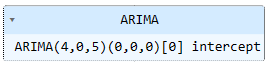

In [ ]:
# Luego el sistema escogera nuestra mejor opcion en ARIMA
Continuando con el model_auto saldra la siguiente tabla

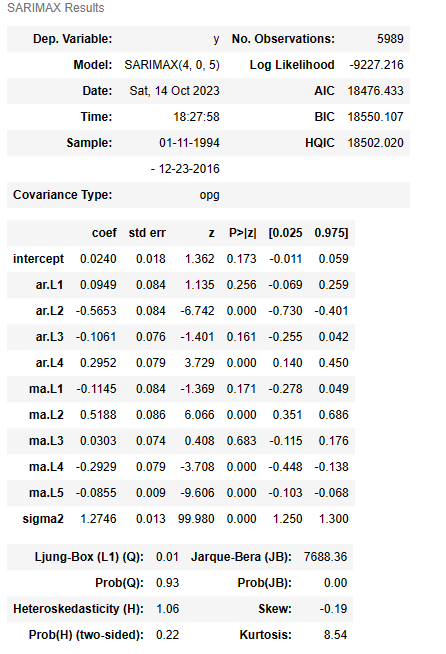

In [ ]:
# Nota
model_auto = auto_arima(df_comp.ret_ftse[1:], exogenous = df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_comp)*0.2))


# !!! Important Note: In pdmarima v1.5.2, out_of_sample_size is replaced with out_of_sample, so make sure to use the latter!


# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob'
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

In [ ]:
# Ejecutamos el comando mencionado de model_auto
model_auto = auto_arima(df_comp.ret_ftse[1:], exogenous = df_comp[['ret_spx', 'ret_dax', 'ret_nikkei']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_comp)*0.2))

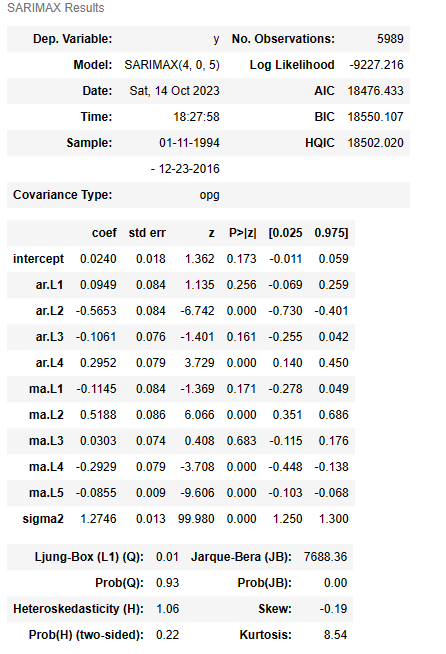

# Sección - N° 12
#**Previsión.ipynb**

In [ ]:
pip install arch

In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance
from arch import arch_model
import warnings

# Instala pmdarima si aún no lo tienes
try:
    import pmdarima
except ModuleNotFoundError:
    !pip install pmdarima

# Instala arch si aún no lo tienes
try:
    import arch
except ModuleNotFoundError:
    !pip install arch

warnings.filterwarnings("ignore")
sns.set()


In [ ]:
import yfinance as yf

# Descargar datos de varios índices bursátiles
tickers = "^GSPC ^FTSE ^N225 ^GDAXI"
start_date = "1994-01-07"
end_date = "2023-09-22"

raw_data = yf.download(tickers, start=start_date, end=end_date, interval="1d", group_by='ticker', auto_adjust=True, threads=True)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
#Crea una copia de datos desde Yahoo Finance en el DataFrame
df_comp = raw_data.copy()

In [ ]:
#El código agrega nuevas columnas al DataFrame df_comp, cada una correspondiente a un índice bursátil específico
#y copia los precios de cierre de esos índices desde raw_data para su posterior análisis.
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [ ]:
#El código elimina las filas y columnas no deseadas, establece la frecuencia de los datos en días laborables
#Llena los valores faltantes con los últimos valores válidos
#conocidos en el DataFrame df_comp, lo que prepara los datos para su análisis de series temporales.

df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

**Creando retornos**

In [ ]:
#El código calcula y agrega las tasas de retorno diario en porcentaje
#para cuatro índices bursátiles (S&P 500, FTSE 100, DAX y Nikkei 225) en el DataFrame df_comp.

df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [ ]:
#El código calcula y agrega nuevas columnas al DataFrame df_comp que representan los retornos normalizados
#de los índices bursátiles (S&P 500, FTSE 100, DAX y Nikkei 225).

df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

**Dividir los datos**

In [ ]:
#Este código divide el DataFrame df_comp en dos conjuntos de datos, df y df_test, para su posterior análisis.
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(df.ftse, order=(1, 0, 0))
results_ar = model_ar.fit()

#El código ajusta un modelo ARIMA (Autoregressive Integrated Moving Average) a los datos
#del índice FTSE 100 (df.ftse) utilizando un orden específico (1, 0, 0).
#Esto permite modelar y predecir la serie de tiempo del índice FTSE 100 utilizando un componente autoregresivo (AR)
#de orden 1 y sin diferenciación (0) en el componente integrado y el componente de media móvil (MA).
#Los resultados del modelo se almacenan en results_ar y se pueden utilizar para hacer predicciones
#y realizar análisis de series temporales en los datos del FTSE 100.


Simple Forecasting

In [ ]:
#El código df.tail() se utiliza para mostrar las últimas filas del DataFrame df
df.tail()

spx           dax         ftse        nikkei   ret_spx  \
                                                                             
Date                                                                         
2017-10-06  2549.330078  12955.940430  7522.899902  20690.710938 -0.107363   
2017-10-09  2544.729980  12976.400391  7507.899902  20690.710938 -0.180443   
2017-10-10  2550.639893  12949.250000  7538.299805  20823.509766  0.232241   
2017-10-11  2555.239990  12970.679688  7533.799805  20881.269531  0.180351   
2017-10-12  2550.929932  12982.889648  7556.200195  20954.720703 -0.168675   

            ret_ftse   ret_dax ret_nikkei norm_ret_spx norm_ret_ftse  \
                                                                       
Date                                                                   
2017-10-06  0.198454 -0.093379   0.301283    44.760817    -25.477556   
2017-10-09 -0.199391  0.157920   0.000000    75.228529     25.597915   
2017-10-10  0.404906 -0.209229   0.641828   -96.823528    -51.981921   
2017-10-11 -0.059695  0.165490   0.277378   -75.189897      7.663686   
2017-10-12  0.297332  0.094135   0.351756    70.322300    -38.171579   

           norm_ret_dax norm_ret_nikkei  
                                         
Date                                     
2017-10-06   -67.019580      132.901843  
2017-10-09   113.341903        0.000000  
2017-10-10  -150.167685      283.122833  
2017-10-11   118.775225      122.356644  
2017-10-12    67.562573      155.166476

In [ ]:
# crear variables que nos ayuden a cambiar los periodos facilmente en vez de escribirlos cada vez
# asegúrate de que las fechas de inicio y fin son días laborables, de lo contrario el código dará error
start_date = "2020-01-01"
end_date = "2023-09-22"

In [ ]:
#El código se utiliza para predecir los valores futuros de la serie temporal del índice FTSE 100
end_date = "2023-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

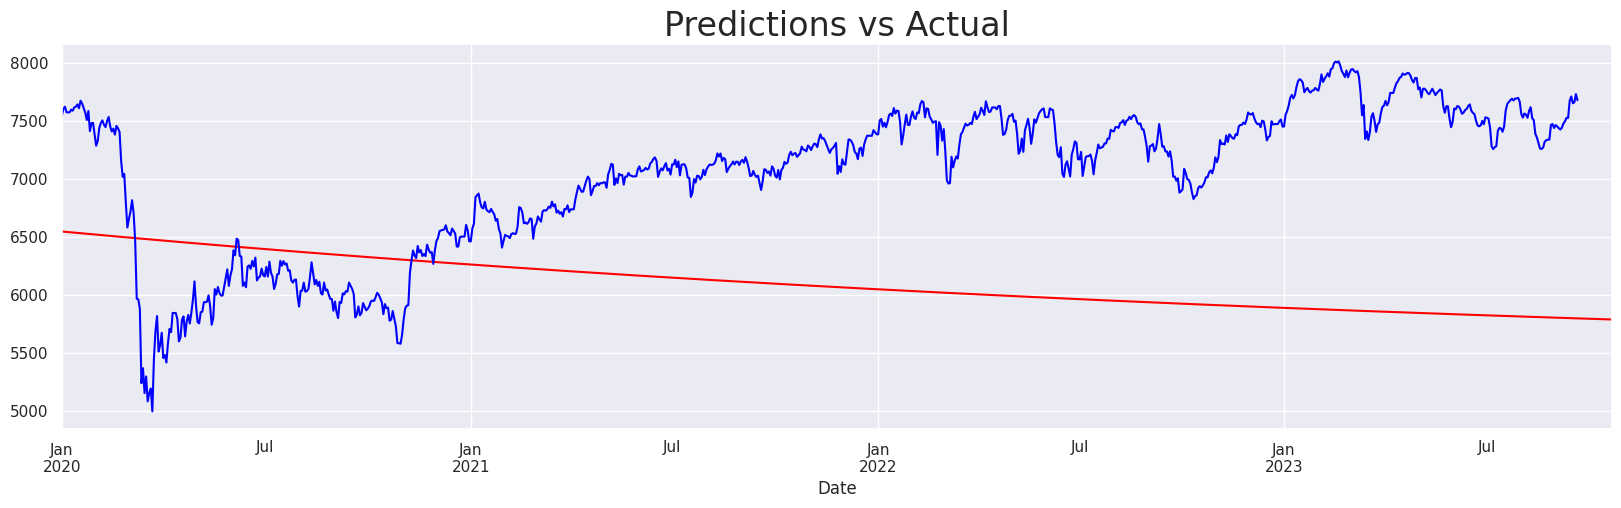

In [ ]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

**Utilizar las devoluciones**

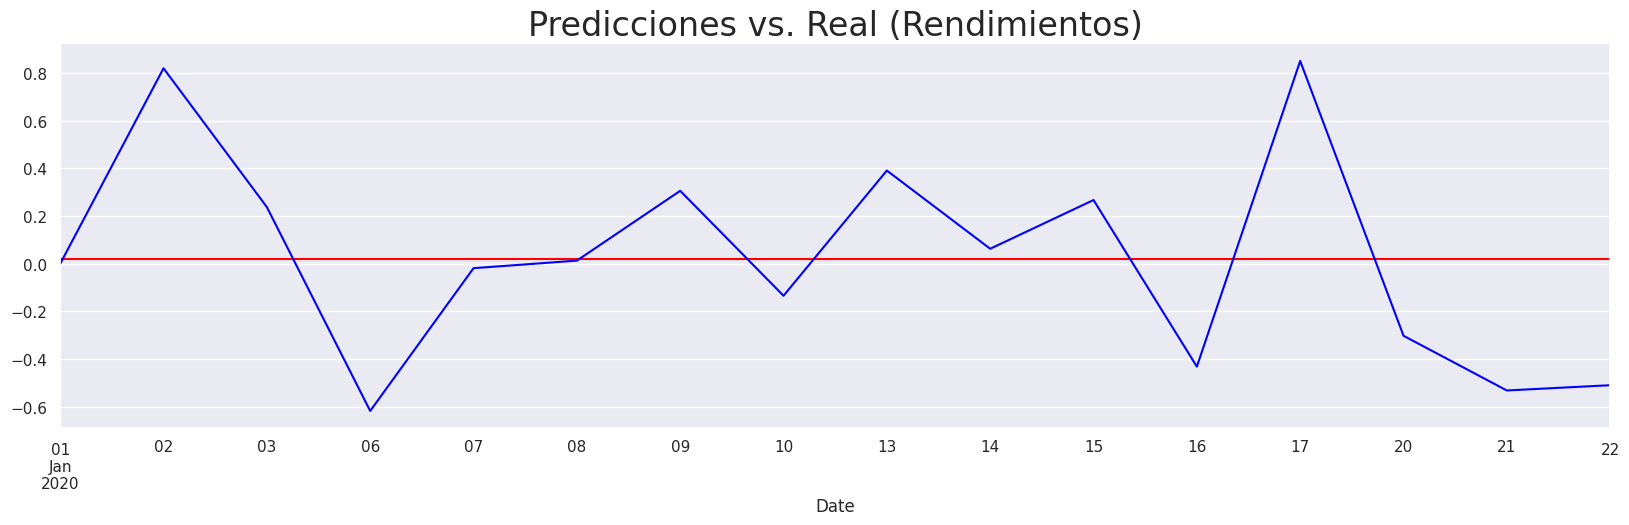

In [ ]:
# Ajusta la fecha final para que sea igual o anterior a la fecha más reciente de tus datos (22 de septiembre de 2023)
end_date = "2020-01-22"  # Fecha final ajustada a tus datos actuales

# Modelo ARIMA
model_ret_ar = ARIMA(df.ret_ftse, order=(5, 0, 0))
results_ret_ar = model_ret_ar.fit()

# Predicción
df_pred_ar = results_ret_ar.predict(start=start_date, end=end_date)

# Graficar predicciones vs. datos reales
df_pred_ar[start_date:end_date].plot(figsize=(20, 5), color="red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predicciones vs. Real (Rendimientos)", size=24)
plt.show()





In [ ]:
# se utiliza para obtener un
#resumen estadístico detallado del modelo ARIMA ajustado a los datos de retornos del índice FTSE 100
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 6199
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -9476.046
Date:                Sun, 15 Oct 2023   AIC                          18966.093
Time:                        00:32:04   BIC                          19013.218
Sample:                    01-10-1994   HQIC                         18982.431
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.484      0.138      -0.006       0.044
ar.L1         -0.0179      0.008     -2.233      0.026      -0.034      -0.002
ar.L2         -0.0522      0.007     -7.339      0.000      -0.066      -0.038
ar.L3         -0.0698      0.007     -9.806      0.000      -0.084      -0.056
ar.L4          0.0290      0.007      3.929      0.000       0.015       0.043
ar.L5         -0.0577      0.007     -8.090      0.000      -0.072      -0.044
sigma2         1.2459      0.012    104.099      0.000       1.222       1.269
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              8486.74
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

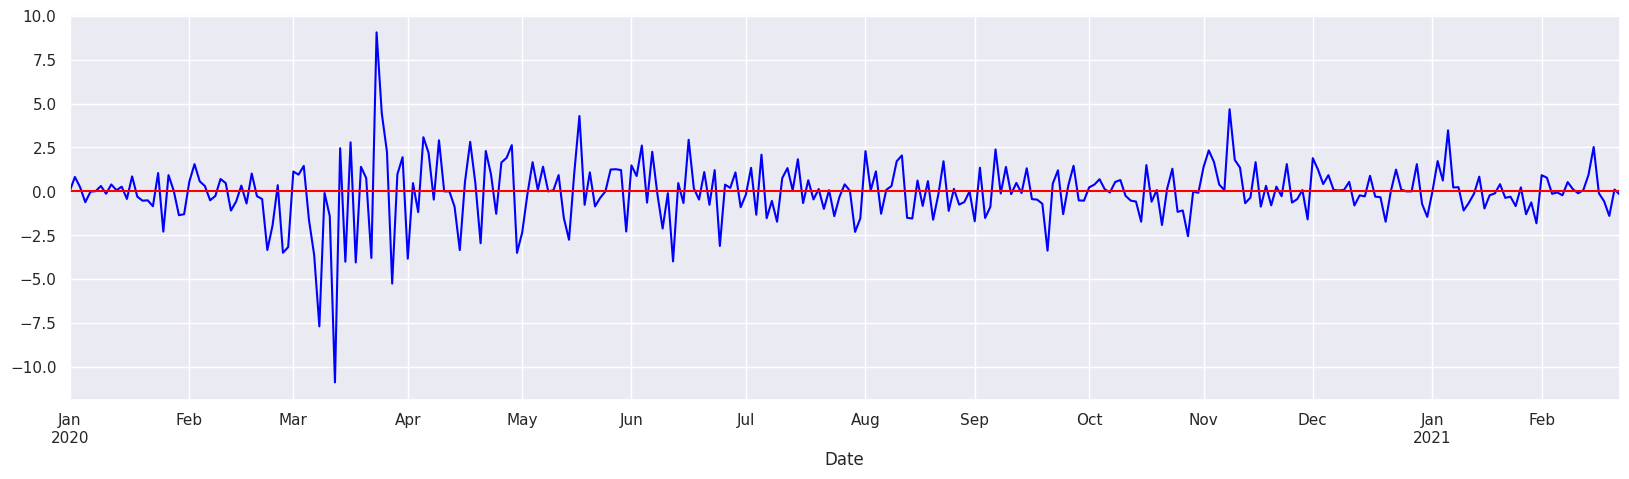

In [ ]:
end_date = "2021-02-22"

from statsmodels.tsa.arima.model import ARIMA

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0, 0, 1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start=start_date, end=end_date)

# Convierte las cadenas de fecha en objetos Timestamp
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Verifica si las fechas especificadas están dentro del índice de df_test.ret_ftse
if (start_date >= df_test.index.min()) and (end_date <= df_test.index.max()):
    # Extrae los datos de df_test.ret_ftse para el rango especificado
    df_test.ret_ftse[start_date:end_date].plot(color="blue")
else:
    print("No hay datos válidos en df_test.ret_ftse para el rango especificado.")

df_pred_ma[start_date:end_date].plot(figsize=(20, 5), color="red")



In [ ]:
# se utiliza para mostrar las primeras filas del DataFrame df_pred_ma
# Que contiene las predicciones hechas por el modelo ARIMA para los retornos del índice FTSE 100
df_pred_ma.head()

2014-01-01    0.014323
2014-01-02    0.019275
2014-01-03    0.028382
2014-01-06    0.015835
2014-01-07    0.019304
Freq: B, Name: predicted_mean, dtype: float64

**ARMA**

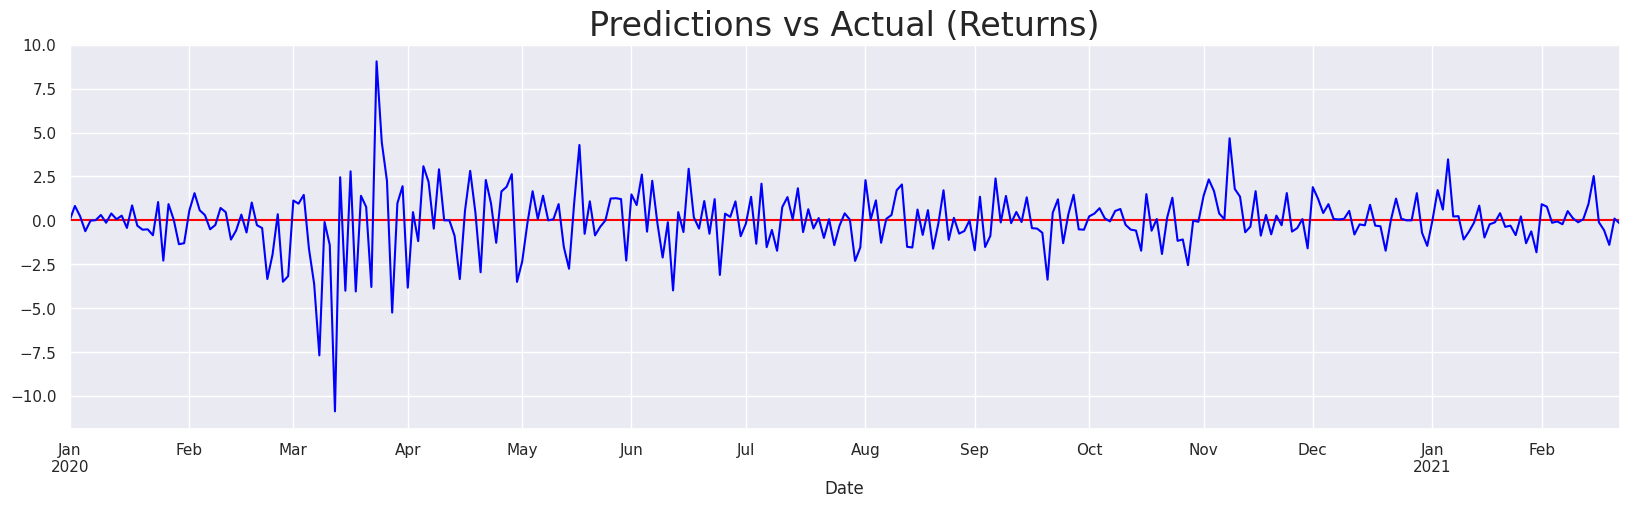

In [ ]:
model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [ ]:
#Mostrar las primeras filas del data frame
df_pred_arma.head()

2014-07-15    0.032578
2014-07-16    0.053453
2014-07-17    0.003285
2014-07-18    0.034800
2014-07-21    0.026431
Freq: B, Name: predicted_mean, dtype: float64

In [ ]:
#Mostrar las últimas filas del data frame
df_pred_arma.tail()

2023-09-18    0.018976
2023-09-19    0.018976
2023-09-20    0.018976
2023-09-21    0.018976
2023-09-22    0.018976
Freq: B, Name: predicted_mean, dtype: float64

In [ ]:
print("Dimensiones de exog_data:", exog_data.shape)
print("Fechas en exog_data:")
print(exog_data.index)
print("Fechas en df_test:")
print(df_test.index)

Dimensiones de exog_data: (299, 3)
Fechas en exog_data:
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22'],
              dtype='datetime64[ns]', name='Date', length=299, freq='B')
Fechas en df_test:
DatetimeIndex(['2017-10-13', '2017-10-16', '2017-10-17', '2017-10-18',
               '2017-10-19', '2017-10-20', '2017-10-23', '2017-10-24',
               '2017-10-25', '2017-10-26',
               ...
               '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21'],
              dtype='datetime64[ns]', name='Date', length=1550, freq='B'

**ARMAX**

In [ ]:
file_url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
# Cargar el archivo CSV desde la URL pública
try:
    # Especifica el delimitador (;) y el formato de la columna 'date' (día/mes/año)
    df_comp = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()  # Copiar el DataFrame
    print("Carga exitosa del archivo CSV.")
    # Realiza aquí cualquier operación adicional que necesites con df_comp
except pd.errors.ParserError as e:
    print("Error al cargar el archivo CSV:", e)
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv(file_url)

# Imprimir el DataFrame
print(df)

Carga exitosa del archivo CSV.
                               date;spx;dax;ftse;nikkei
0             07/01/1994;469.9;2224.95;3445.98;18124.01
1               10/01/1994;475.27;2225;3440.58;18443.44
2             11/01/1994;474.13;2228.1;3413.77;18485.25
3            12/01/1994;474.17;2182.06;3372.02;18793.88
4            13/01/1994;472.47;2142.37;3360.01;18577.26
...                                                 ...
7735  18/09/2023;4453.529785;15727.12012;7652.899902...
7736  19/09/2023;4443.950195;15664.48047;7660.200195...
7737  20/09/2023;4402.200195;15781.58984;7731.700195...
7738  21/09/2023;4330;15571.86035;7678.600098;32571....
7739  22/09/2023;4320.060059;15557.29004;7683.899902...

[7740 rows x 1 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Cargar el DataFrame desde el archivo CSV con el separador adecuado y el formato de fecha
df = pd.read_csv(file_url, sep=';', parse_dates=['date'], dayfirst=True).copy()

# Sección - N°13


In [ ]:
!pip install numpy pandas scipy statsmodels matplotlib seaborn scikit-learn pmdarima arch yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 15.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()


In [ ]:
#Importando data
!pip install yfinance


In [ ]:
import yfinance as yf

tickers = ["VOW3.DE", "PAH3.DE", "BMW.DE"]

raw_data = yf.download(tickers=tickers, interval="1d", group_by='ticker', auto_adjust=True, threads=True)


[*********************100%%**********************]  3 of 3 completed


In [ ]:
df = raw_data.copy()


In [ ]:
#Defining Key Dates
# Definir las fechas
start_date = "2009-04-05"
ann_1 = "2009-12-09"
ann_2 = "2012-07-05"
end_date = "2014-01-01"
d_gate = '2015-09-20'


In [ ]:
#Pre-processing the Data

# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume




In [ ]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [ ]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

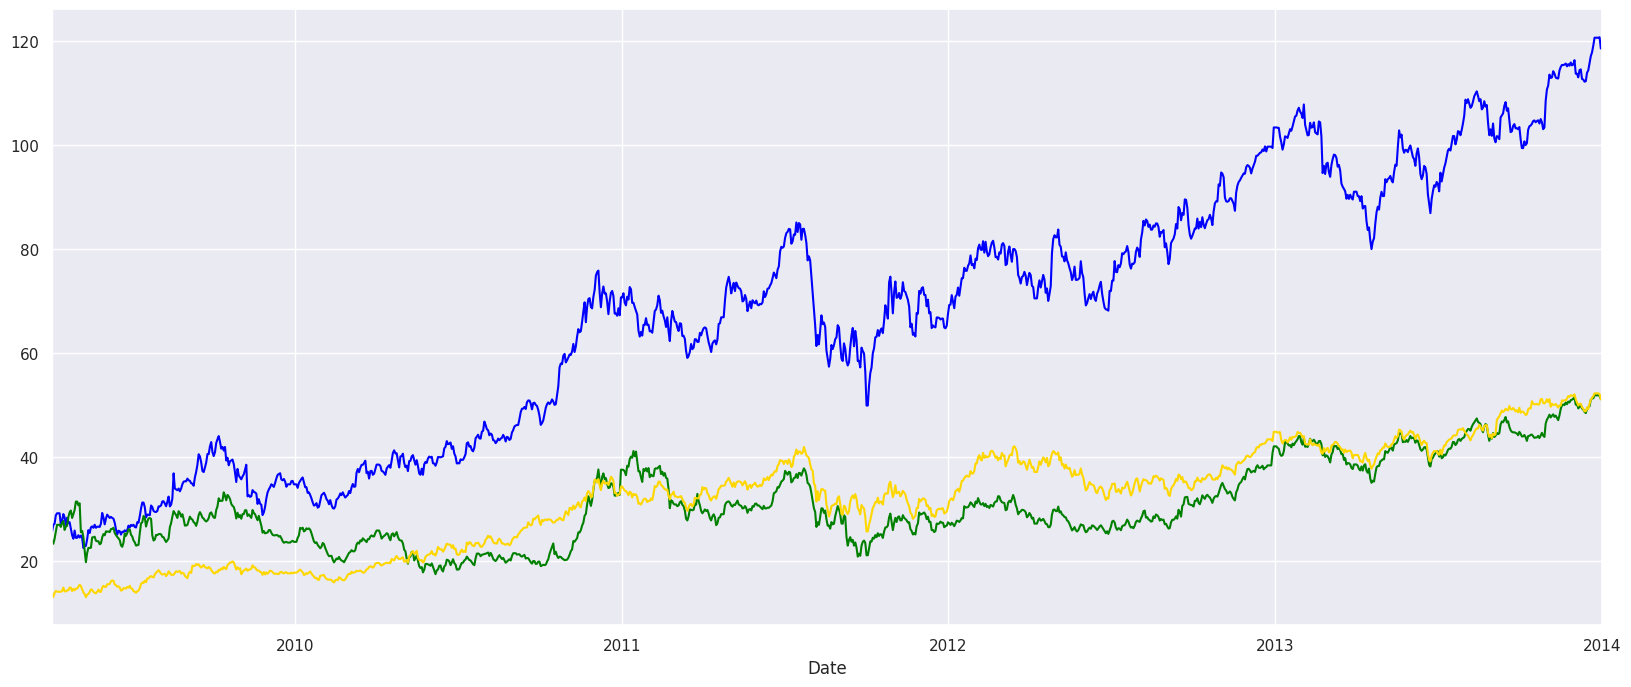

In [ ]:
#Plotting the Prices
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

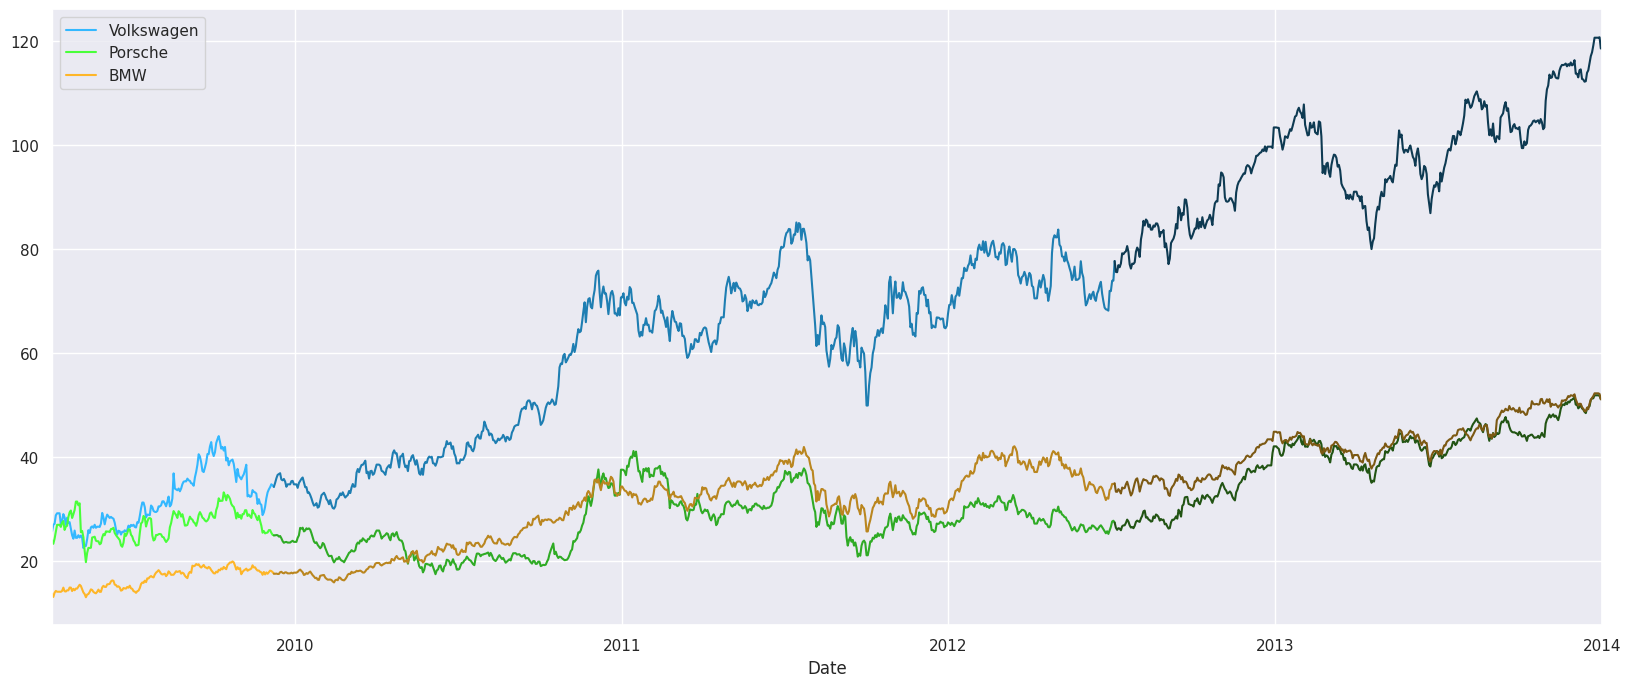

In [ ]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

In [ ]:
#Correlation
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8359547063074693
Volkswagen and BMW correlation: 	0.9799378273258413
Porsche and BMW correlation: 		0.8052157852068462


In [ ]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.66335844390866
Volkswagen and BMW correlation: 	0.8427608266556299
Porsche and BMW correlation: 		0.6095040592107049


In [ ]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267922612733
Volkswagen and BMW correlation: 	0.979594304999317
Porsche and BMW correlation: 		0.7042723202013126


In [ ]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.940523725629436
Volkswagen and BMW correlation: 	0.9284447608257507
Porsche and BMW correlation: 		0.9494111680122773


In [ ]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2014-01-01 to 2023-10-13 00:00:00

Volkswagen and Porsche correlation: 	0.8745437951946066
Volkswagen and BMW correlation: 	0.5271094745656132
Porsche and BMW correlation: 		0.4980895311652295


In [ ]:
#Best Fitting Models
#For Volkswagen
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)


In [ ]:
mod_pr_pre_vol.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -272.460
Date:                Sun, 15 Oct 2023   AIC                            546.921
Time:                        03:00:31   BIC                            550.097
Sample:                    04-06-2009   HQIC                           548.209
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2722      0.071     17.983      0.000       1.134       1.411
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               232.52
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1218.001
Date:                Sun, 15 Oct 2023   AIC                           2440.001
Time:                        03:07:35   BIC                           2449.019
Sample:                    12-09-2009   HQIC                          2443.494
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0899      0.034      2.645      0.008       0.023       0.156
sigma2         2.2089      0.088     24.998      0.000       2.036       2.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                85.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.54   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -690.499
Date:                Sun, 15 Oct 2023   AIC                           1384.999
Time:                        03:09:46   BIC                           1392.926
Sample:                    07-05-2012   HQIC                          1388.141
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.047      1.861      0.063      -0.005       0.180
sigma2         2.0385      0.106     19.175      0.000       1.830       2.247
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                61.79
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.15
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#For Porsche
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -242.737
Date:                Sun, 15 Oct 2023   AIC                            487.475
Time:                        03:25:57   BIC                            490.651
Sample:                    04-06-2009   HQIC                           488.763
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9093      0.048     19.004      0.000       0.816       1.003
===================================================================================
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):               319.80
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -774.789
Date:                Sun, 15 Oct 2023   AIC                           1553.578
Time:                        03:37:35   BIC                           1562.595
Sample:                    12-09-2009   HQIC                          1557.070
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1096      0.032      3.457      0.001       0.047       0.172
sigma2         0.5895      0.018     32.054      0.000       0.553       0.625
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               483.16
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -388.989
Date:                Sun, 15 Oct 2023   AIC                            781.977
Time:                        03:39:49   BIC                            789.905
Sample:                    07-05-2012   HQIC                           785.120
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0610      0.033      1.824      0.068      -0.005       0.127
sigma2         0.4326      0.024     17.659      0.000       0.385       0.481
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                25.52
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.14
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

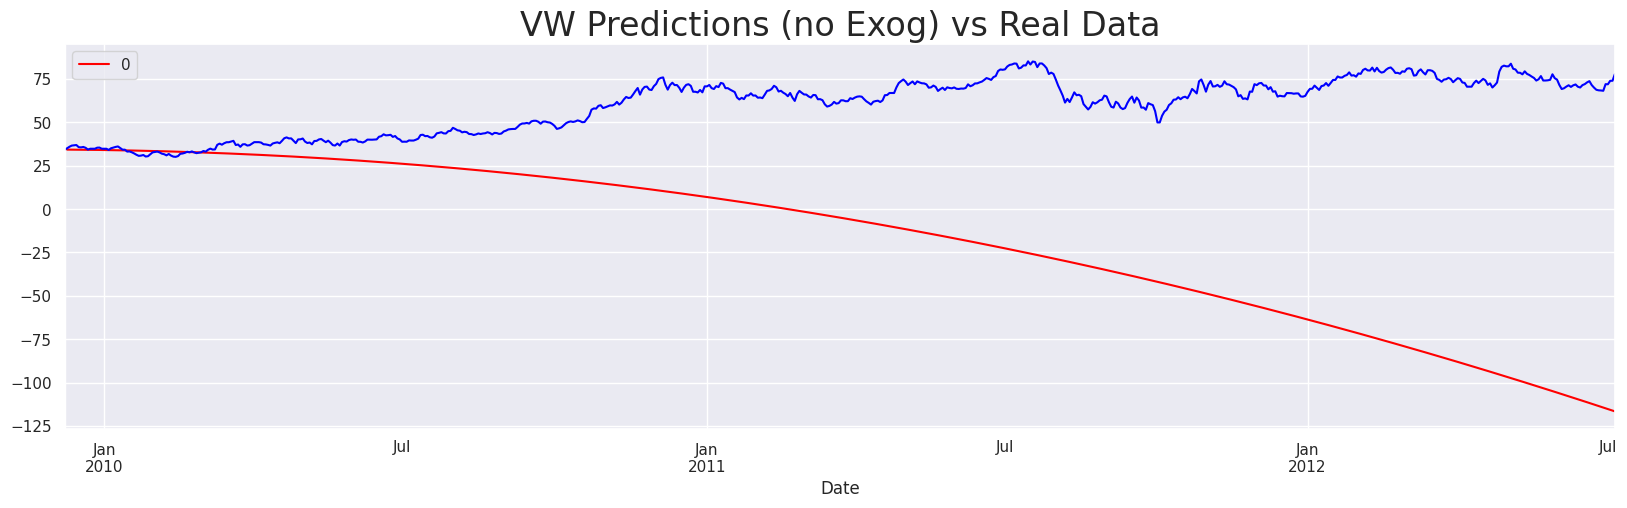

In [ ]:
#Predictions for the Future
#For Porsche
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

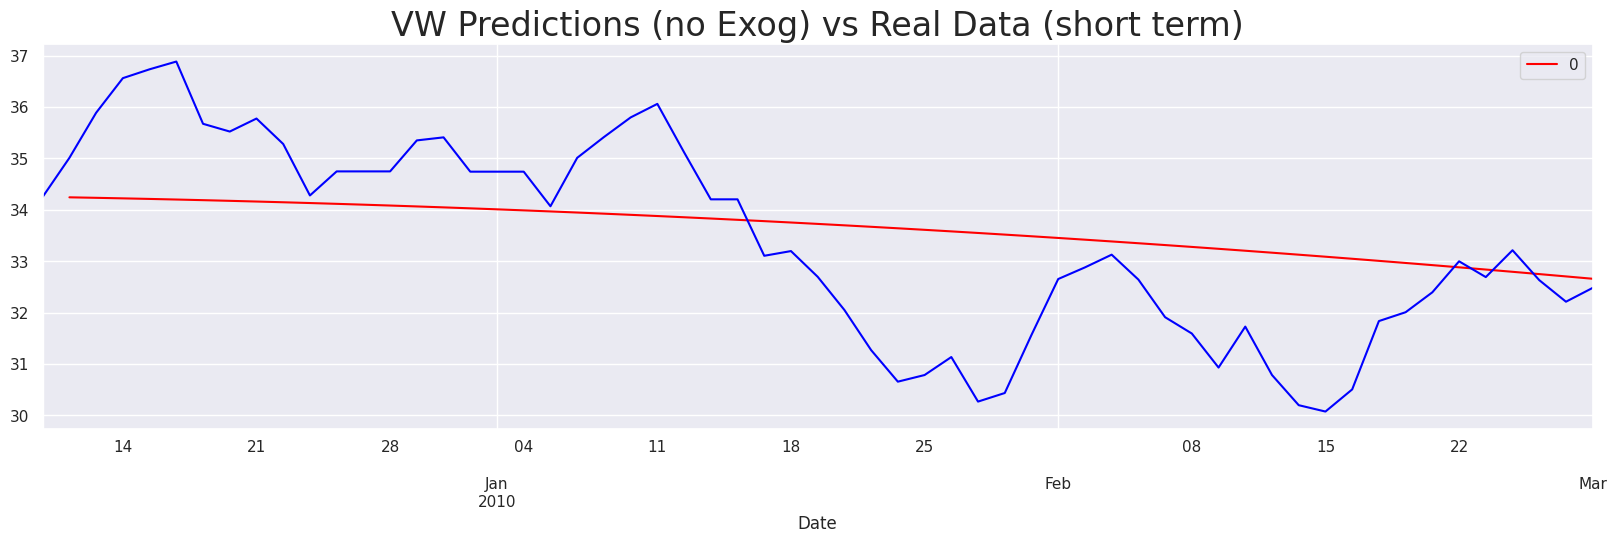

In [ ]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

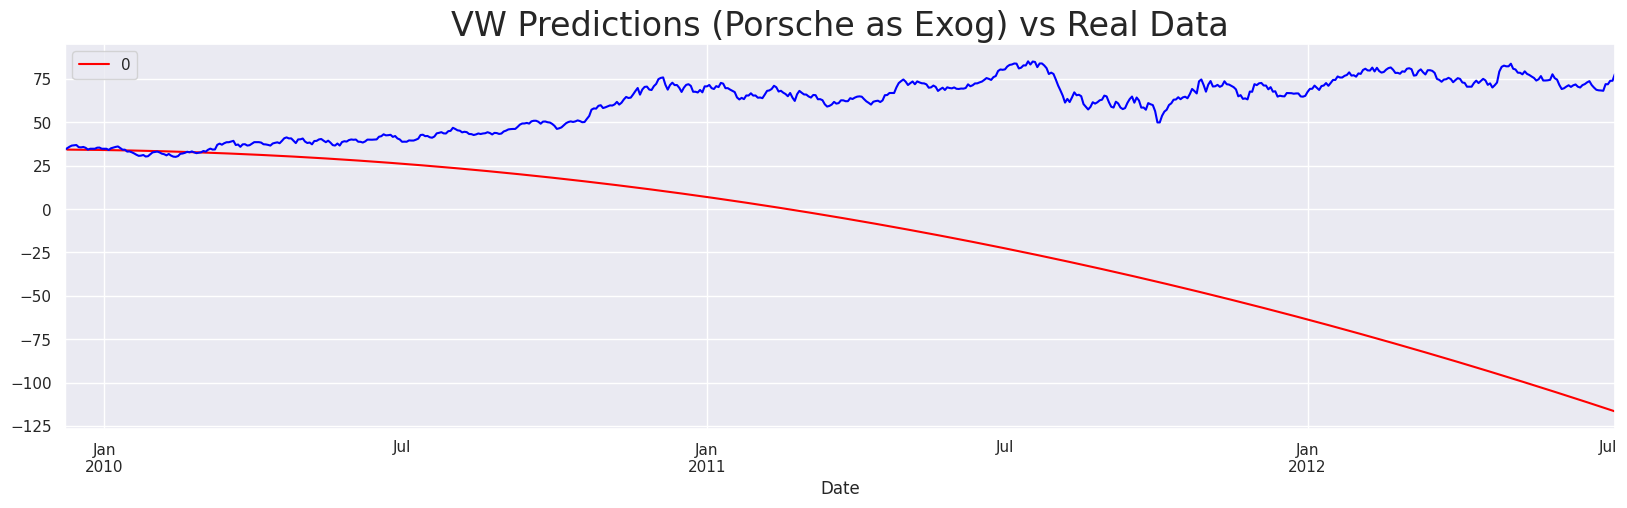

In [ ]:
#For Volkswagen
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

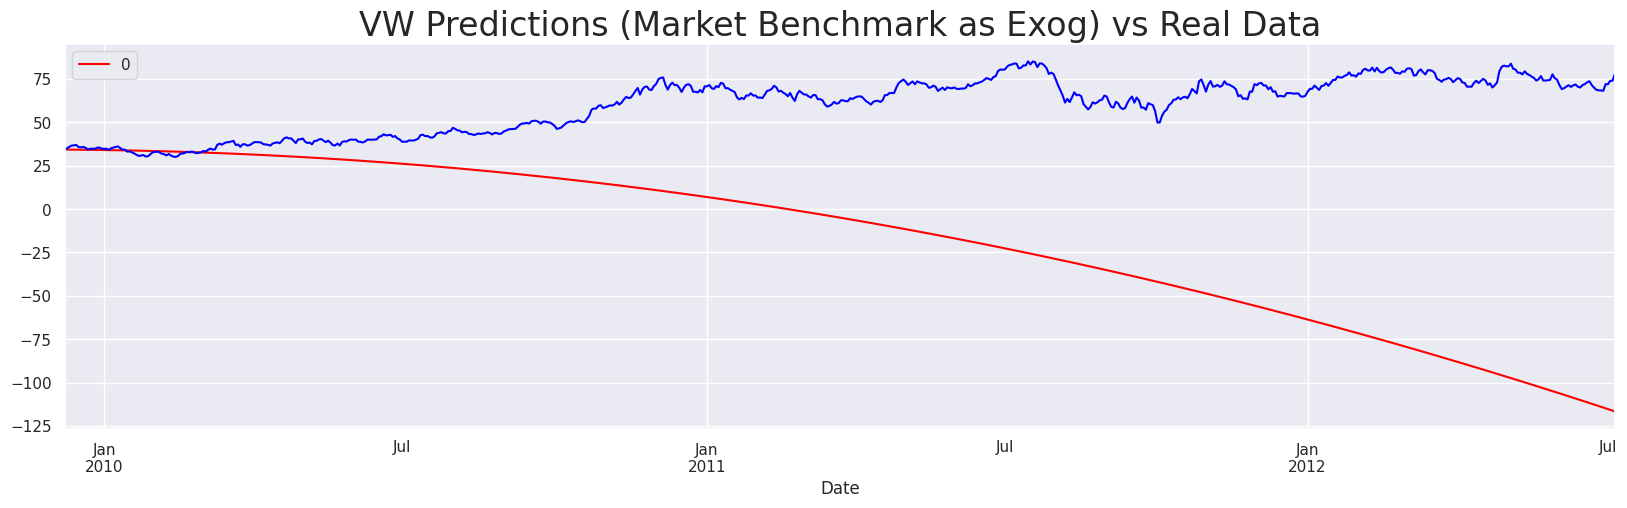

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

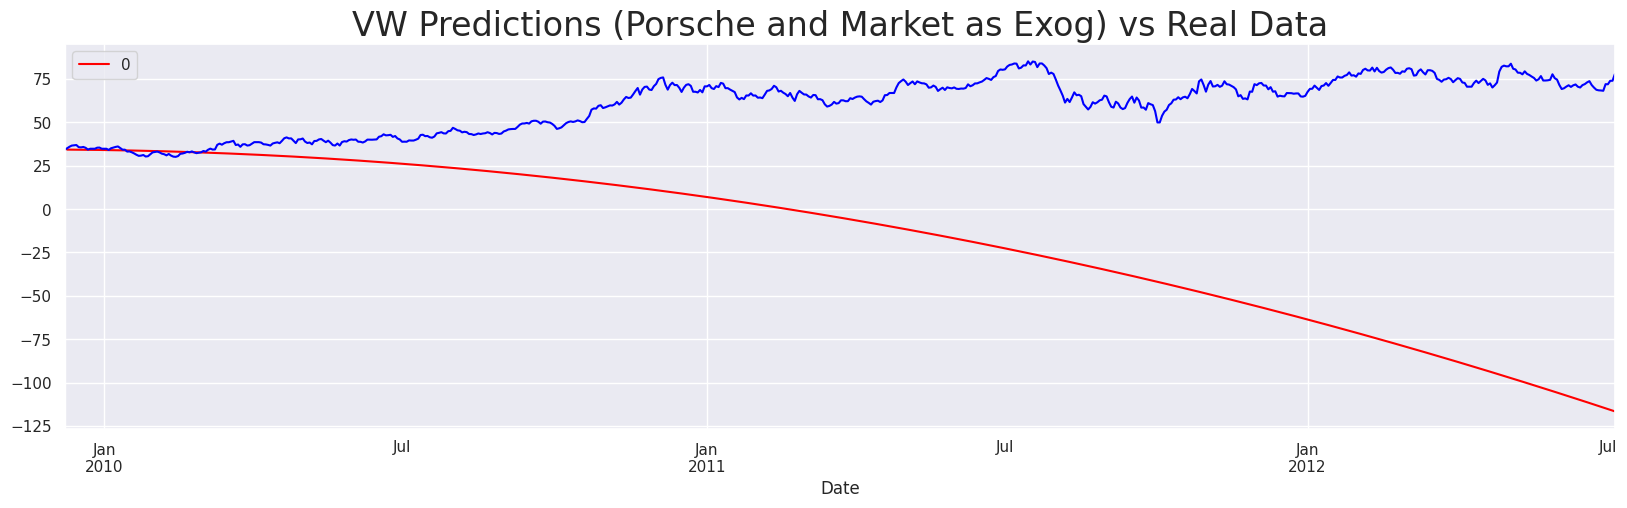

In [ ]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

In [ ]:
#Volatility
#Volatility of VW for Each Period
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

In [ ]:
#Volatility Trends for Each Period
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     31,   Neg. LLF: 475.7774804300914
Iteration:     10,   Func. Count:     56,   Neg. LLF: 475.0030727001451
Iteration:     15,   Func. Count:     80,   Neg. LLF: 474.99041909509936
Optimization terminated successfully    (Exit mode 0)
            Current function value: 474.99041904280546
            Iterations: 15
            Function evaluations: 80
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1526.7533341087246
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1526.7314030142884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1526.7314030130437
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     34,   Neg. LLF: 724.5619847041118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 724.5576400566899
            Iterations: 7
           

In [ ]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.990
Distribution:                  Normal   AIC:                           957.981
Method:            Maximum Likelihood   BIC:                           970.708
                                        No. Observations:                  178
Date:                Sun, Oct 15 2023   Df Residuals:                      177
Time:                        03:49:48   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1570      0.266      0.589      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6195      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.195e-02      1.675  9.399e-02 [-2.623e-02,  0.334]
beta[1]    1.1091e-13      0.349  3.176e-13      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Sun, Oct 15 2023   Df Residuals:                      671
Time:                        03:49:48   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.301e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""